In [1]:
from datetime import datetime, timedelta ,timezone
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

Part 1

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import yfinance as yf

# Data Collectionا
start_date = '2021-07-01'
end_date = '2023-12-01'
tickerData = yf.Ticker('BTC-USD')
currency = tickerData.history(period="1d", start=start_date, end=end_date)
currency = currency[['Close']]
currency

Close
Date                                   
2021-07-01 00:00:00+00:00  33572.117188
2021-07-02 00:00:00+00:00  33897.046875
2021-07-03 00:00:00+00:00  34668.546875
2021-07-04 00:00:00+00:00  35287.781250
2021-07-05 00:00:00+00:00  33746.003906
...                                 ...
2023-11-26 00:00:00+00:00  37479.121094
2023-11-27 00:00:00+00:00  37254.167969
2023-11-28 00:00:00+00:00  37831.085938
2023-11-29 00:00:00+00:00  37858.492188
2023-11-30 00:00:00+00:00  37712.746094

[883 rows x 1 columns]

In [4]:
train_end = datetime(2023, 7, 1, tzinfo=timezone.utc)
test_end = datetime(2023, 12, 1, tzinfo=timezone.utc)

train_data = currency[:train_end]
test_data = currency.loc[train_end + timedelta(days=1):test_end]

Part 2

In [5]:
def find_best_arima(data):
    best_aic = np.inf
    best_model = None
    best_order = None

    for p in range(6):
        for q in range(6):
            try:
                model = ARIMA(data, order=(p,0,q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_model = results
                    best_order = (p,0,q)
            except:
                    continue
    return best_model, best_order

In [6]:
!pip install arch

In [7]:
from arch import arch_model


def generate_signals():
    signals = []
    
    for i in range(len(test_data)):
        window_data = currency.iloc[i:i + len(train_data)]

        best_model, best_order = find_best_arima(window_data)
        
        residuals = best_model.resid
        
        am = arch_model(residuals, vol="Garch", p=best_order[0], q=best_order[2])
        garch_model = am.fit()
        
        
        garch_forecast = garch_model.forecast(horizon=1)
        garch_mean = garch_forecast.mean
        signals.append(garch_mean.iloc[-1])
        
    data = [m[0] for m in signals]
    return pd.DataFrame(data, columns=['Signal'], index=test_data.index)


In [8]:
training = generate_signals()

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7886.5647369444805
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6082.283149845365
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6074.399418672145
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6060.4647200786585
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6053.244322325423
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6055.7332774622955
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6045.387877890955
Iteration:      8,   Func. Count:    103,   Neg. LLF: 6044.706017422535
Iteration:      9,   Func. Count:    115,   Neg. LLF: 6180.004175855716
Iteration:     10,   Func. Count:    128,   Neg. LLF: 6045.992309414634
Iteration:     11,   Func. Count:    141,   Neg. LLF: 6044.552756554309
Iteration:     12,   Func. Count:    153,   Neg. LLF: 6044.539285509943
Iteration:     13,   Func. Count:    165,   Neg. LLF: 6044.538553514234
Iteration:     14,   Func. Count:    177,   Neg. LLF: 6044.53

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7902.340039018279
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6082.917216223692
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6076.1376068645095
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6054.87437685448
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6062.728427771958
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6065.362712072942
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6046.745063564003
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6045.193419073974
Iteration:      9,   Func. Count:    116,   Neg. LLF: 6049.6691037459395
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6088.019114484145
Iteration:     11,   Func. Count:    143,   Neg. LLF: 6044.724254100478
Iteration:     12,   Func. Count:    155,   Neg. LLF: 6044.634425606007
Iteration:     13,   Func. Count:    167,   Neg. LLF: 6044.632561539269
Iteration:     14,   Func. Count:    179,   Neg. LLF: 6044.6309

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:      9,   Neg. LLF: 7947.457439736674
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6089.507841276727
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6066.520413669703
Iteration:      4,   Func. Count:     37,   Neg. LLF: 6085.808837294873
Iteration:      5,   Func. Count:     46,   Neg. LLF: 6065.0134237413195
Iteration:      6,   Func. Count:     55,   Neg. LLF: 6061.769658536083
Iteration:      7,   Func. Count:     63,   Neg. LLF: 6064.922316602522
Iteration:      8,   Func. Count:     72,   Neg. LLF: 6061.572029745192
Iteration:      9,   Func. Count:     80,   Neg. LLF: 6061.560272142097
Iteration:     10,   Func. Count:     88,   Neg. LLF: 6061.55442193727
Iteration:     11,   Func. Count:     96,   Neg. LLF: 6061.548994053519
Iteration:     12,   Func. Count:    104,   Neg. LLF: 6061.547713225316
Iteration:     13,   Func. Count:    112,   Neg. LLF: 6061.547373807867
Iteration:     14,   Func. Count:    120,   Neg. LLF: 6061.54709

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:      9,   Neg. LLF: 7934.653437720379
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6089.6304008289935
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6117.228517735695
Iteration:      4,   Func. Count:     37,   Neg. LLF: 6087.465661071537
Iteration:      5,   Func. Count:     46,   Neg. LLF: 6064.780052897242
Iteration:      6,   Func. Count:     54,   Neg. LLF: 6064.2944247881205
Iteration:      7,   Func. Count:     62,   Neg. LLF: 6116.187966324353
Iteration:      8,   Func. Count:     71,   Neg. LLF: 6062.6453957141475
Iteration:      9,   Func. Count:     79,   Neg. LLF: 6062.539574279423
Iteration:     10,   Func. Count:     87,   Neg. LLF: 6062.507160591147
Iteration:     11,   Func. Count:     95,   Neg. LLF: 6062.504289286946
Iteration:     12,   Func. Count:    103,   Neg. LLF: 6062.502044153247
Iteration:     13,   Func. Count:    111,   Neg. LLF: 6062.50200449537
Iteration:     14,   Func. Count:    119,   Neg. LLF: 6062.501

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 7970.447986875681
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6085.676609715172
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6063.005741560359
Iteration:      4,   Func. Count:     37,   Neg. LLF: 6082.403614831086
Iteration:      5,   Func. Count:     46,   Neg. LLF: 6061.231528283179
Iteration:      6,   Func. Count:     54,   Neg. LLF: 6058.8471795609585
Iteration:      7,   Func. Count:     62,   Neg. LLF: 6071.17103316154
Iteration:      8,   Func. Count:     71,   Neg. LLF: 6058.456551328865
Iteration:      9,   Func. Count:     79,   Neg. LLF: 6058.449176361037
Iteration:     10,   Func. Count:     87,   Neg. LLF: 6058.440000289904
Iteration:     11,   Func. Count:     95,   Neg. LLF: 6058.43417575466
Iteration:     12,   Func. Count:    103,   Neg. LLF: 6058.427514863459
Iteration:     13,   Func. Count:    111,   Neg. LLF: 6058.426068926932
Iteration:     14,   Func. Count:    119,   Neg. LLF: 6058.425643

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7882.219273803148
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6079.068010483981
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6070.723687466851
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6063.424629043143
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6053.63126543379
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6065.018821120845
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6043.7533014358905
Iteration:      8,   Func. Count:    103,   Neg. LLF: 6042.895444481157
Iteration:      9,   Func. Count:    115,   Neg. LLF: 6169.365176407325
Iteration:     10,   Func. Count:    128,   Neg. LLF: 6042.239807478283
Iteration:     11,   Func. Count:    140,   Neg. LLF: 6043.2127450183925
Iteration:     12,   Func. Count:    153,   Neg. LLF: 6041.946859605108
Iteration:     13,   Func. Count:    165,   Neg. LLF: 6041.863638866333
Iteration:     14,   Func. Count:    177,   Neg. LLF: 6041.8521

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7886.727894992603
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6078.583761933425
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6069.309116508154
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6061.281690987123
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6053.364876781816
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6064.404538222785
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6042.8811405072465
Iteration:      8,   Func. Count:    103,   Neg. LLF: 6041.89678669686
Iteration:      9,   Func. Count:    115,   Neg. LLF: 6226.205669754457
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6041.143126323155
Iteration:     11,   Func. Count:    141,   Neg. LLF: 6042.912817409357
Iteration:     12,   Func. Count:    154,   Neg. LLF: 6042.184688054995
Iteration:     13,   Func. Count:    167,   Neg. LLF: 6041.018785745766
Iteration:     14,   Func. Count:    179,   Neg. LLF: 6041.01569

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7853.524803890265
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6077.21492251878
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6067.018857929449
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6110.225920927914
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6048.562171970213
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6061.861792930667
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6041.82740295781
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6039.887600322294
Iteration:      9,   Func. Count:    116,   Neg. LLF: 6045.638835354122
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6039.516864967555
Iteration:     11,   Func. Count:    141,   Neg. LLF: 6040.4213105714225
Iteration:     12,   Func. Count:    154,   Neg. LLF: 6039.443145279554
Iteration:     13,   Func. Count:    167,   Neg. LLF: 6039.414447153013
Iteration:     14,   Func. Count:    179,   Neg. LLF: 6039.410562

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7866.364432921977
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6076.6133312978145
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6066.201265339836
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6078.220720831641
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6048.685868455381
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6065.0726951794
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6043.22090008018
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6040.735232706753
Iteration:      9,   Func. Count:    116,   Neg. LLF: 6040.100432254545
Iteration:     10,   Func. Count:    128,   Neg. LLF: 6096.655866757566
Iteration:     11,   Func. Count:    141,   Neg. LLF: 6039.470743380174
Iteration:     12,   Func. Count:    153,   Neg. LLF: 6039.411154436496
Iteration:     13,   Func. Count:    165,   Neg. LLF: 6039.330458870008
Iteration:     14,   Func. Count:    177,   Neg. LLF: 6039.3231521

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7870.134877899833
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6075.294754005453
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6063.932226104667
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6053.836905511865
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6051.9486045271415
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6061.81957297187
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6039.513092942404
Iteration:      8,   Func. Count:    103,   Neg. LLF: 6038.48282958323
Iteration:      9,   Func. Count:    115,   Neg. LLF: 6048.299963044344
Iteration:     10,   Func. Count:    128,   Neg. LLF: 6039.549830448323
Iteration:     11,   Func. Count:    141,   Neg. LLF: 6038.194075354631
Iteration:     12,   Func. Count:    153,   Neg. LLF: 6038.155729796428
Iteration:     13,   Func. Count:    165,   Neg. LLF: 6038.1526298883255
Iteration:     14,   Func. Count:    177,   Neg. LLF: 6038.14719

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7972.556207325747
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6074.016579319611
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6086.156696960199
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6677.391045712658
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6080.031963512971
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6077.040624639858
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6072.433011863265
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6079.361961642904
Iteration:      9,   Func. Count:    117,   Neg. LLF: 6046.625907393525
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6051.392989414993
Iteration:     11,   Func. Count:    142,   Neg. LLF: 6077.871691001682
Iteration:     12,   Func. Count:    155,   Neg. LLF: 6044.776316338111
Iteration:     13,   Func. Count:    167,   Neg. LLF: 6044.901728423629
Iteration:     14,   Func. Count:    180,   Neg. LLF: 6044.25145

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     13,   Neg. LLF: 8024.461128915822
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6072.413469160924
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6084.544656724771
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6685.346311344194
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6076.495978701254
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6075.46689882975
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6069.377568342194
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6073.187311516207
Iteration:      9,   Func. Count:    117,   Neg. LLF: 6049.882126813229
Iteration:     10,   Func. Count:    130,   Neg. LLF: 6067.76448290032
Iteration:     11,   Func. Count:    143,   Neg. LLF: 6043.636027659626
Iteration:     12,   Func. Count:    155,   Neg. LLF: 6043.364071129687
Iteration:     13,   Func. Count:    167,   Neg. LLF: 6043.1306162426545
Iteration:     14,   Func. Count:    179,   Neg. LLF: 6043.051666

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7974.014508806211
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6073.088201898099
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6086.713131007009
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6669.00543929399
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6079.3344943491975
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6078.382550891792
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6068.960442432393
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6073.814472856228
Iteration:      9,   Func. Count:    117,   Neg. LLF: 6045.977293066417
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6050.329228505405
Iteration:     11,   Func. Count:    142,   Neg. LLF: 6051.364370947739
Iteration:     12,   Func. Count:    156,   Neg. LLF: 6043.889826504257
Iteration:     13,   Func. Count:    168,   Neg. LLF: 6043.926031598004
Iteration:     14,   Func. Count:    181,   Neg. LLF: 6043.29057

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7968.2102411367205
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6073.852766757098
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6085.534283175073
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6637.388606530598
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6082.201195857622
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6081.750814613755
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6069.721699653931
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6073.744413476944
Iteration:      9,   Func. Count:    117,   Neg. LLF: 6048.495136849662
Iteration:     10,   Func. Count:    130,   Neg. LLF: 6051.218058579855
Iteration:     11,   Func. Count:    143,   Neg. LLF: 6046.672126826359
Iteration:     12,   Func. Count:    156,   Neg. LLF: 6044.400786639766
Iteration:     13,   Func. Count:    168,   Neg. LLF: 6044.57858133124
Iteration:     14,   Func. Count:    181,   Neg. LLF: 6044.28091

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 8007.434112025319
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6073.021144459059
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6090.074298216519
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6670.353365868119
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6087.999045517297
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6081.136543075199
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6070.84312195725
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6082.889170048351
Iteration:      9,   Func. Count:    117,   Neg. LLF: 6046.363230995648
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6050.473620050807
Iteration:     11,   Func. Count:    142,   Neg. LLF: 6058.110119600309
Iteration:     12,   Func. Count:    156,   Neg. LLF: 6044.21248819795
Iteration:     13,   Func. Count:    168,   Neg. LLF: 6044.012477323311
Iteration:     14,   Func. Count:    180,   Neg. LLF: 6043.7384994

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7969.362476182267
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6072.823072393362
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6085.616161881482
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6629.692675638987
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6085.680029783949
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6079.366863819766
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6070.426254258136
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6086.170452200062
Iteration:      9,   Func. Count:    117,   Neg. LLF: 6045.5368699661285
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6050.251290840473
Iteration:     11,   Func. Count:    142,   Neg. LLF: 6079.487367803871
Iteration:     12,   Func. Count:    155,   Neg. LLF: 6043.663920560573
Iteration:     13,   Func. Count:    167,   Neg. LLF: 6044.618979019661
Iteration:     14,   Func. Count:    180,   Neg. LLF: 6043.0320

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 8025.0143455252255
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6071.826591440802
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6088.576293484912
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6666.3806299554
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6090.614446381205
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6078.930741975976
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6118.0275893370745
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6060.0392138434545
Iteration:      9,   Func. Count:    117,   Neg. LLF: 6045.971891331161
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6044.290729495536
Iteration:     11,   Func. Count:    141,   Neg. LLF: 6050.577410654209
Iteration:     12,   Func. Count:    154,   Neg. LLF: 6050.08153755961
Iteration:     13,   Func. Count:    167,   Neg. LLF: 6042.555698100901
Iteration:     14,   Func. Count:    179,   Neg. LLF: 6042.29699

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 7848.270991620464
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6080.563519539656
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6114.908618639383
Iteration:      4,   Func. Count:     37,   Neg. LLF: 6080.137677000263
Iteration:      5,   Func. Count:     46,   Neg. LLF: 6054.661464291314
Iteration:      6,   Func. Count:     54,   Neg. LLF: 6055.194584221117
Iteration:      7,   Func. Count:     63,   Neg. LLF: 6063.24845294381
Iteration:      8,   Func. Count:     72,   Neg. LLF: 6054.469067642935
Iteration:      9,   Func. Count:     80,   Neg. LLF: 6054.459393912706
Iteration:     10,   Func. Count:     88,   Neg. LLF: 6052.898412332339
Iteration:     11,   Func. Count:     96,   Neg. LLF: 6054.44821794571
Iteration:     12,   Func. Count:    107,   Neg. LLF: 6052.515787501145
Iteration:     13,   Func. Count:    115,   Neg. LLF: 6052.511802229883
Iteration:     14,   Func. Count:    123,   Neg. LLF: 6052.5113964

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7981.35756678173
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6070.0927453830145
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6082.742212007824
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6612.652464683577
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6098.793328561458
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6085.907336004287
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6080.439346526011
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6044.349140355999
Iteration:      9,   Func. Count:    116,   Neg. LLF: 6047.55063630471
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6236.719749161135
Iteration:     11,   Func. Count:    143,   Neg. LLF: 6061.946452495431
Iteration:     12,   Func. Count:    156,   Neg. LLF: 6042.36336185435
Iteration:     13,   Func. Count:    169,   Neg. LLF: 6053.350973433734
Iteration:     14,   Func. Count:    182,   Neg. LLF: 6040.8260969

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22656.651896131938
Iteration:      2,   Func. Count:     20,   Neg. LLF: 6153.918317374189
Iteration:      3,   Func. Count:     29,   Neg. LLF: 6077.543487180573
Iteration:      4,   Func. Count:     38,   Neg. LLF: 6090.976142676565
Iteration:      5,   Func. Count:     47,   Neg. LLF: 6052.815043925407
Iteration:      6,   Func. Count:     55,   Neg. LLF: 6052.107650080116
Iteration:      7,   Func. Count:     63,   Neg. LLF: 6051.863401226893
Iteration:      8,   Func. Count:     71,   Neg. LLF: 6051.495439362365
Iteration:      9,   Func. Count:     79,   Neg. LLF: 6051.394202036353
Iteration:     10,   Func. Count:     87,   Neg. LLF: 6051.373578339306
Iteration:     11,   Func. Count:     95,   Neg. LLF: 6051.373320926926
Iteration:     12,   Func. Count:    103,   Neg. LLF: 6051.373279146795
Iteration:     13,   Func. Count:    111,   Neg. LLF: 6051.373028342799
Iteration:     14,   Func. Count:    119,   Neg. LLF: 6051.3723

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7943.254319707332
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6066.040191396871
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6077.594822004502
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6641.045594518593
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6086.138721729875
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6076.743782755899
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6119.543050755603
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6058.06378759411
Iteration:      9,   Func. Count:    117,   Neg. LLF: 6040.318422904693
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6038.851550960542
Iteration:     11,   Func. Count:    141,   Neg. LLF: 6069.736669173086
Iteration:     12,   Func. Count:    154,   Neg. LLF: 6041.493399984119
Iteration:     13,   Func. Count:    167,   Neg. LLF: 6040.037345081118
Iteration:     14,   Func. Count:    180,   Neg. LLF: 6037.703459

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7898.903455064918
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6065.437816164576
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6076.338483947361
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6613.908004742442
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6087.325115151263
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6077.125936398873
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6112.636192874591
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6058.952476874985
Iteration:      9,   Func. Count:    117,   Neg. LLF: 6039.365344658886
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6038.048217577963
Iteration:     11,   Func. Count:    141,   Neg. LLF: 6068.443570162299
Iteration:     12,   Func. Count:    154,   Neg. LLF: 6037.70630128612
Iteration:     13,   Func. Count:    167,   Neg. LLF: 6038.458289624046
Iteration:     14,   Func. Count:    180,   Neg. LLF: 6036.278567

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7914.794124594394
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6064.920598084969
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6075.4767667069245
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6609.909643543815
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6085.121716501952
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6076.686986782018
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6108.860010352808
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6058.440600557898
Iteration:      9,   Func. Count:    117,   Neg. LLF: 6038.392668718509
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6037.061869584544
Iteration:     11,   Func. Count:    141,   Neg. LLF: 6064.4298309818005
Iteration:     12,   Func. Count:    154,   Neg. LLF: 6036.486373895299
Iteration:     13,   Func. Count:    166,   Neg. LLF: 6036.275466529078
Iteration:     14,   Func. Count:    178,   Neg. LLF: 6036.219

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7831.3793429014495
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6063.839030807568
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6053.238838522077
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6155.846503176232
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6048.231023617778
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6060.426217499747
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6045.206069101263
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6028.917432211929
Iteration:      9,   Func. Count:    116,   Neg. LLF: 6029.521551008451
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6047.764525200415
Iteration:     11,   Func. Count:    142,   Neg. LLF: 6028.793549012961
Iteration:     12,   Func. Count:    155,   Neg. LLF: 6028.645618924831
Iteration:     13,   Func. Count:    168,   Neg. LLF: 6028.6316123301485
Iteration:     14,   Func. Count:    180,   Neg. LLF: 6028.623

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7923.200270799733
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6064.6903716183715
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6076.030282580036
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6565.1453219917275
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6100.162472890386
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6086.071274134974
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6080.583425132512
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6039.426153771191
Iteration:      9,   Func. Count:    117,   Neg. LLF: 6042.728563544933
Iteration:     10,   Func. Count:    130,   Neg. LLF: 6341.203308128446
Iteration:     11,   Func. Count:    144,   Neg. LLF: 6055.728941542759
Iteration:     12,   Func. Count:    158,   Neg. LLF: 6036.159469424447
Iteration:     13,   Func. Count:    170,   Neg. LLF: 6034.9760180517715
Iteration:     14,   Func. Count:    182,   Neg. LLF: 6040.93

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     13,   Neg. LLF: 8027.567006800267
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6064.787625280849
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6144.665284075756
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6070.354293962617
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6639.3569398004065
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6047.16642738768
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6574.305550852252
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6071.656998959301
Iteration:      9,   Func. Count:    117,   Neg. LLF: 6132.158145467927
Iteration:     10,   Func. Count:    130,   Neg. LLF: 6036.639200654551
Iteration:     11,   Func. Count:    142,   Neg. LLF: 6082.555452226084
Iteration:     12,   Func. Count:    155,   Neg. LLF: 6036.51270642266
Iteration:     13,   Func. Count:    168,   Neg. LLF: 6037.549132786982
Iteration:     14,   Func. Count:    181,   Neg. LLF: 6036.043394

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 7759.650298870405
Iteration:      2,   Func. Count:     24,   Neg. LLF: 6069.099643076857
Iteration:      3,   Func. Count:     36,   Neg. LLF: 6039.049338262639
Iteration:      4,   Func. Count:     48,   Neg. LLF: 6242.048327776691
Iteration:      5,   Func. Count:     60,   Neg. LLF: 6046.991878310215
Iteration:      6,   Func. Count:     72,   Neg. LLF: 6054.07680502951
Iteration:      7,   Func. Count:     84,   Neg. LLF: 6067.0824190640105
Iteration:      8,   Func. Count:     96,   Neg. LLF: 6115.672692028322
Iteration:      9,   Func. Count:    108,   Neg. LLF: 6060.964300585521
Iteration:     10,   Func. Count:    120,   Neg. LLF: 6031.797895307696
Iteration:     11,   Func. Count:    131,   Neg. LLF: 6031.590097816742
Iteration:     12,   Func. Count:    142,   Neg. LLF: 6031.5601081447485
Iteration:     13,   Func. Count:    153,   Neg. LLF: 6031.556188795248
Iteration:     14,   Func. Count:    164,   Neg. LLF: 6031.5555

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 7741.771003655772
Iteration:      2,   Func. Count:     24,   Neg. LLF: 6066.361471950659
Iteration:      3,   Func. Count:     36,   Neg. LLF: 6037.727485019681
Iteration:      4,   Func. Count:     48,   Neg. LLF: 6128.141494969182
Iteration:      5,   Func. Count:     60,   Neg. LLF: 6118.296260375251
Iteration:      6,   Func. Count:     73,   Neg. LLF: 6098.224913276856
Iteration:      7,   Func. Count:     85,   Neg. LLF: 6036.04904468492
Iteration:      8,   Func. Count:     97,   Neg. LLF: 6038.375786451716
Iteration:      9,   Func. Count:    109,   Neg. LLF: 6031.678447276887
Iteration:     10,   Func. Count:    120,   Neg. LLF: 6031.130426740014
Iteration:     11,   Func. Count:    131,   Neg. LLF: 6031.079234578595
Iteration:     12,   Func. Count:    142,   Neg. LLF: 6030.985008890434
Iteration:     13,   Func. Count:    153,   Neg. LLF: 6030.9727422740725
Iteration:     14,   Func. Count:    164,   Neg. LLF: 6030.97576

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7897.782881662457
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6065.933712093576
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6094.523230516319
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6066.867665985396
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6065.13970812208
Iteration:      6,   Func. Count:     78,   Neg. LLF: 7011.76491319398
Iteration:      7,   Func. Count:     92,   Neg. LLF: 6973.060169848041
Iteration:      8,   Func. Count:    107,   Neg. LLF: 6037.2070233954455
Iteration:      9,   Func. Count:    119,   Neg. LLF: 6052.392757324029
Iteration:     10,   Func. Count:    132,   Neg. LLF: 6039.860856527515
Iteration:     11,   Func. Count:    145,   Neg. LLF: 6034.988886978349
Iteration:     12,   Func. Count:    157,   Neg. LLF: 6047.4471182097095
Iteration:     13,   Func. Count:    170,   Neg. LLF: 6054.145255224421
Iteration:     14,   Func. Count:    184,   Neg. LLF: 6034.73180

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22680.372874664594
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6148.130080936692
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6071.95551234179
Iteration:      4,   Func. Count:     37,   Neg. LLF: 6087.85317100345
Iteration:      5,   Func. Count:     46,   Neg. LLF: 6049.509123329139
Iteration:      6,   Func. Count:     54,   Neg. LLF: 6048.888446781144
Iteration:      7,   Func. Count:     62,   Neg. LLF: 6048.7603433282975
Iteration:      8,   Func. Count:     70,   Neg. LLF: 6048.504396100108
Iteration:      9,   Func. Count:     78,   Neg. LLF: 6048.420893707173
Iteration:     10,   Func. Count:     86,   Neg. LLF: 6048.410011143651
Iteration:     11,   Func. Count:     94,   Neg. LLF: 6048.409810091855
Iteration:     12,   Func. Count:    102,   Neg. LLF: 6048.409710914288
Iteration:     13,   Func. Count:    110,   Neg. LLF: 6048.409181515708
Iteration:     14,   Func. Count:    118,   Neg. LLF: 6048.40805

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22675.98134716525
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6146.132000239847
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6072.829756460882
Iteration:      4,   Func. Count:     37,   Neg. LLF: 6086.030512100197
Iteration:      5,   Func. Count:     46,   Neg. LLF: 6046.917591229259
Iteration:      6,   Func. Count:     54,   Neg. LLF: 6046.211763394074
Iteration:      7,   Func. Count:     62,   Neg. LLF: 6046.0010733667405
Iteration:      8,   Func. Count:     70,   Neg. LLF: 6045.559199118197
Iteration:      9,   Func. Count:     78,   Neg. LLF: 6045.485551224952
Iteration:     10,   Func. Count:     86,   Neg. LLF: 6045.463984464313
Iteration:     11,   Func. Count:     94,   Neg. LLF: 6045.463234928464
Iteration:     12,   Func. Count:    102,   Neg. LLF: 6045.462494199966
Iteration:     13,   Func. Count:    110,   Neg. LLF: 6045.461944504985
Iteration:     14,   Func. Count:    118,   Neg. LLF: 6045.4594

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22664.361087668436
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6147.981136629865
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6068.98270920402
Iteration:      4,   Func. Count:     37,   Neg. LLF: 6079.048763616407
Iteration:      5,   Func. Count:     46,   Neg. LLF: 6043.257914868844
Iteration:      6,   Func. Count:     54,   Neg. LLF: 6042.740549104322
Iteration:      7,   Func. Count:     62,   Neg. LLF: 6042.504240393007
Iteration:      8,   Func. Count:     70,   Neg. LLF: 6042.316924952187
Iteration:      9,   Func. Count:     78,   Neg. LLF: 6042.282263382737
Iteration:     10,   Func. Count:     86,   Neg. LLF: 6042.27951486229
Iteration:     11,   Func. Count:     94,   Neg. LLF: 6042.2793864195955
Iteration:     12,   Func. Count:    102,   Neg. LLF: 6042.278867218311
Iteration:     13,   Func. Count:    110,   Neg. LLF: 6042.277354901125
Iteration:     14,   Func. Count:    118,   Neg. LLF: 6042.27399

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22660.257563740855
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6144.685226577763
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6069.093437967641
Iteration:      4,   Func. Count:     37,   Neg. LLF: 6078.434512106602
Iteration:      5,   Func. Count:     46,   Neg. LLF: 6041.215651396802
Iteration:      6,   Func. Count:     54,   Neg. LLF: 6040.589196822006
Iteration:      7,   Func. Count:     62,   Neg. LLF: 6040.296418108265
Iteration:      8,   Func. Count:     70,   Neg. LLF: 6040.034977235791
Iteration:      9,   Func. Count:     78,   Neg. LLF: 6039.9834722132
Iteration:     10,   Func. Count:     86,   Neg. LLF: 6039.979648701105
Iteration:     11,   Func. Count:     94,   Neg. LLF: 6039.979290151623
Iteration:     12,   Func. Count:    102,   Neg. LLF: 6039.9790316930485
Iteration:     13,   Func. Count:    110,   Neg. LLF: 6039.978273567563
Iteration:     14,   Func. Count:    118,   Neg. LLF: 6039.97451

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22655.22379114532
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6150.008194991836
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6066.637260891973
Iteration:      4,   Func. Count:     37,   Neg. LLF: 6073.291402563922
Iteration:      5,   Func. Count:     46,   Neg. LLF: 6038.301757434631
Iteration:      6,   Func. Count:     54,   Neg. LLF: 6037.77183587147
Iteration:      7,   Func. Count:     62,   Neg. LLF: 6037.539332640996
Iteration:      8,   Func. Count:     70,   Neg. LLF: 6037.307603551597
Iteration:      9,   Func. Count:     78,   Neg. LLF: 6037.268919148824
Iteration:     10,   Func. Count:     86,   Neg. LLF: 6037.265195705605
Iteration:     11,   Func. Count:     94,   Neg. LLF: 6037.265043918866
Iteration:     12,   Func. Count:    102,   Neg. LLF: 6037.264826281911
Iteration:     13,   Func. Count:    110,   Neg. LLF: 6037.263652697171
Iteration:     14,   Func. Count:    118,   Neg. LLF: 6037.260928

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7692.08933627919
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6056.00790904687
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6224.009730154892
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6114.7753649097085
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6033.414107179307
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6034.671742563272
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6027.120838402825
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6017.140840864502
Iteration:      9,   Func. Count:    116,   Neg. LLF: 6016.964892691353
Iteration:     10,   Func. Count:    128,   Neg. LLF: 6017.101158872477
Iteration:     11,   Func. Count:    141,   Neg. LLF: 6016.8289554192315
Iteration:     12,   Func. Count:    153,   Neg. LLF: 6016.812692887313
Iteration:     13,   Func. Count:    165,   Neg. LLF: 6016.81038483421
Iteration:     14,   Func. Count:    177,   Neg. LLF: 6016.793766

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7812.603212166428
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6054.897524999567
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6079.808123594438
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6061.403996870149
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6060.569032420098
Iteration:      6,   Func. Count:     78,   Neg. LLF: 6614.659095440346
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6557.337079083454
Iteration:      8,   Func. Count:    104,   Neg. LLF: 7904.7750031072355
Iteration:      9,   Func. Count:    118,   Neg. LLF: 6058.600520300814
Iteration:     10,   Func. Count:    131,   Neg. LLF: 6031.379242383864
Iteration:     11,   Func. Count:    144,   Neg. LLF: 6038.369165380738
Iteration:     12,   Func. Count:    157,   Neg. LLF: 6026.40586495332
Iteration:     13,   Func. Count:    169,   Neg. LLF: 6524.511791423221
Iteration:     14,   Func. Count:    183,   Neg. LLF: 6026.29070

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22681.14668760939
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6139.308192701228
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6071.947474197968
Iteration:      4,   Func. Count:     37,   Neg. LLF: 6075.595813159998
Iteration:      5,   Func. Count:     46,   Neg. LLF: 6040.379171659346
Iteration:      6,   Func. Count:     54,   Neg. LLF: 6079.674694301642
Iteration:      7,   Func. Count:     63,   Neg. LLF: 6039.594640704898
Iteration:      8,   Func. Count:     71,   Neg. LLF: 6038.95852361257
Iteration:      9,   Func. Count:     79,   Neg. LLF: 6089.386509648139
Iteration:     10,   Func. Count:     88,   Neg. LLF: 6040.918655386288
Iteration:     11,   Func. Count:     97,   Neg. LLF: 6038.258915909873
Iteration:     12,   Func. Count:    105,   Neg. LLF: 6038.23771702955
Iteration:     13,   Func. Count:    113,   Neg. LLF: 6038.234392094053
Iteration:     14,   Func. Count:    121,   Neg. LLF: 6038.2342909

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22692.172564027875
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6235.329949877675
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6048.259939010761
Iteration:      4,   Func. Count:     49,   Neg. LLF: 6032.473293912799
Iteration:      5,   Func. Count:     61,   Neg. LLF: 6033.135941915474
Iteration:      6,   Func. Count:     73,   Neg. LLF: 6030.4491810148365
Iteration:      7,   Func. Count:     85,   Neg. LLF: 6052.598182116649
Iteration:      8,   Func. Count:     97,   Neg. LLF: 6026.418714813462
Iteration:      9,   Func. Count:    109,   Neg. LLF: 6020.084590836441
Iteration:     10,   Func. Count:    120,   Neg. LLF: 6019.149965143117
Iteration:     11,   Func. Count:    131,   Neg. LLF: 6019.027383832664
Iteration:     12,   Func. Count:    142,   Neg. LLF: 6019.078215825044
Iteration:     13,   Func. Count:    154,   Neg. LLF: 6018.968765323893
Iteration:     14,   Func. Count:    165,   Neg. LLF: 6018.958

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22686.091625513476
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6236.362395054346
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6047.983844263779
Iteration:      4,   Func. Count:     49,   Neg. LLF: 6030.872448919874
Iteration:      5,   Func. Count:     61,   Neg. LLF: 6029.639489127344
Iteration:      6,   Func. Count:     73,   Neg. LLF: 6019.500213476868
Iteration:      7,   Func. Count:     85,   Neg. LLF: 6050.275033543236
Iteration:      8,   Func. Count:     97,   Neg. LLF: 6049.782700971548
Iteration:      9,   Func. Count:    109,   Neg. LLF: 6017.311642934784
Iteration:     10,   Func. Count:    120,   Neg. LLF: 6017.0859276334395
Iteration:     11,   Func. Count:    131,   Neg. LLF: 6017.039488138839
Iteration:     12,   Func. Count:    142,   Neg. LLF: 6016.940085372253
Iteration:     13,   Func. Count:    153,   Neg. LLF: 6016.938463317258
Iteration:     14,   Func. Count:    164,   Neg. LLF: 6016.938

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22706.535134407997
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6244.874536130128
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6051.078143117977
Iteration:      4,   Func. Count:     49,   Neg. LLF: 6042.0083206521895
Iteration:      5,   Func. Count:     61,   Neg. LLF: 6034.507716168277
Iteration:      6,   Func. Count:     73,   Neg. LLF: 6029.681102106872
Iteration:      7,   Func. Count:     85,   Neg. LLF: 6055.681679194704
Iteration:      8,   Func. Count:     97,   Neg. LLF: 6019.990441239551
Iteration:      9,   Func. Count:    108,   Neg. LLF: 6022.20317563182
Iteration:     10,   Func. Count:    121,   Neg. LLF: 6020.273797803973
Iteration:     11,   Func. Count:    133,   Neg. LLF: 6019.976138593505
Iteration:     12,   Func. Count:    145,   Neg. LLF: 6019.944629502115
Iteration:     13,   Func. Count:    156,   Neg. LLF: 6019.943367526186
Iteration:     14,   Func. Count:    167,   Neg. LLF: 6019.9432

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22699.116687619426
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6245.44034418557
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6043.093175544278
Iteration:      4,   Func. Count:     49,   Neg. LLF: 6031.39690662873
Iteration:      5,   Func. Count:     61,   Neg. LLF: 6041.464942150209
Iteration:      6,   Func. Count:     73,   Neg. LLF: 6025.272859920304
Iteration:      7,   Func. Count:     85,   Neg. LLF: 6048.357643894111
Iteration:      8,   Func. Count:     97,   Neg. LLF: 6022.923735173341
Iteration:      9,   Func. Count:    109,   Neg. LLF: 6022.828686268822
Iteration:     10,   Func. Count:    121,   Neg. LLF: 6017.446966997044
Iteration:     11,   Func. Count:    132,   Neg. LLF: 6017.403215039054
Iteration:     12,   Func. Count:    143,   Neg. LLF: 6017.550196319484
Iteration:     13,   Func. Count:    155,   Neg. LLF: 6017.353632996472
Iteration:     14,   Func. Count:    167,   Neg. LLF: 6017.309597

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22699.33527329268
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6256.69322520157
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6046.307757818797
Iteration:      4,   Func. Count:     49,   Neg. LLF: 6039.073181158978
Iteration:      5,   Func. Count:     61,   Neg. LLF: 6030.437467573445
Iteration:      6,   Func. Count:     73,   Neg. LLF: 6027.614257022024
Iteration:      7,   Func. Count:     85,   Neg. LLF: 6051.556463635344
Iteration:      8,   Func. Count:     97,   Neg. LLF: 6016.444172644419
Iteration:      9,   Func. Count:    108,   Neg. LLF: 6022.701950319139
Iteration:     10,   Func. Count:    120,   Neg. LLF: 6049.830637580003
Iteration:     11,   Func. Count:    132,   Neg. LLF: 6015.602370564129
Iteration:     12,   Func. Count:    144,   Neg. LLF: 6015.477385191274
Iteration:     13,   Func. Count:    155,   Neg. LLF: 6015.471002852515
Iteration:     14,   Func. Count:    166,   Neg. LLF: 6015.470108

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22688.867133601165
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6260.244429569368
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6040.7140131968445
Iteration:      4,   Func. Count:     49,   Neg. LLF: 6030.296846651824
Iteration:      5,   Func. Count:     61,   Neg. LLF: 6027.1986993625615
Iteration:      6,   Func. Count:     73,   Neg. LLF: 6021.129746660636
Iteration:      7,   Func. Count:     85,   Neg. LLF: 6045.228995173232
Iteration:      8,   Func. Count:     97,   Neg. LLF: 6017.5968168584495
Iteration:      9,   Func. Count:    109,   Neg. LLF: 6014.624635997324
Iteration:     10,   Func. Count:    121,   Neg. LLF: 6011.720637521021
Iteration:     11,   Func. Count:    132,   Neg. LLF: 6011.781243022197
Iteration:     12,   Func. Count:    144,   Neg. LLF: 6012.397697026659
Iteration:     13,   Func. Count:    156,   Neg. LLF: 6011.667224521983
Iteration:     14,   Func. Count:    167,   Neg. LLF: 6011.6

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22716.900376988277
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6259.191480250259
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6022.822126943325
Iteration:      4,   Func. Count:     49,   Neg. LLF: 6041.279104310627
Iteration:      5,   Func. Count:     61,   Neg. LLF: 6134.606291325572
Iteration:      6,   Func. Count:     73,   Neg. LLF: 6017.137738291954
Iteration:      7,   Func. Count:     85,   Neg. LLF: 6015.689559660703
Iteration:      8,   Func. Count:     97,   Neg. LLF: 6021.617360241411
Iteration:      9,   Func. Count:    109,   Neg. LLF: 6013.712082750917
Iteration:     10,   Func. Count:    120,   Neg. LLF: 6013.664304379876
Iteration:     11,   Func. Count:    131,   Neg. LLF: 6013.64496906426
Iteration:     12,   Func. Count:    142,   Neg. LLF: 6013.644885936122
Iteration:     13,   Func. Count:    153,   Neg. LLF: 6013.64412114414
Iteration:     14,   Func. Count:    164,   Neg. LLF: 6013.642361

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22709.86591077376
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6267.700949233911
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6019.011559797067
Iteration:      4,   Func. Count:     48,   Neg. LLF: 6022.054519005906
Iteration:      5,   Func. Count:     60,   Neg. LLF: 6509.596522626756
Iteration:      6,   Func. Count:     72,   Neg. LLF: 6081.0600401290685
Iteration:      7,   Func. Count:     84,   Neg. LLF: 6045.185148698694
Iteration:      8,   Func. Count:     96,   Neg. LLF: 6038.607547343017
Iteration:      9,   Func. Count:    108,   Neg. LLF: 6010.92552335179
Iteration:     10,   Func. Count:    119,   Neg. LLF: 6010.878498101851
Iteration:     11,   Func. Count:    130,   Neg. LLF: 6010.872412104427
Iteration:     12,   Func. Count:    141,   Neg. LLF: 6010.871212918396
Iteration:     13,   Func. Count:    152,   Neg. LLF: 6010.8710416194135
Iteration:     14,   Func. Count:    163,   Neg. LLF: 6010.8706

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22709.64074775263
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6273.819259059878
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6017.10691600419
Iteration:      4,   Func. Count:     48,   Neg. LLF: 6027.708763652499
Iteration:      5,   Func. Count:     60,   Neg. LLF: 6140.38004981722
Iteration:      6,   Func. Count:     72,   Neg. LLF: 6071.17802822674
Iteration:      7,   Func. Count:     84,   Neg. LLF: 6031.928946250061
Iteration:      8,   Func. Count:     96,   Neg. LLF: 6009.372149968031
Iteration:      9,   Func. Count:    107,   Neg. LLF: 6013.358749328969
Iteration:     10,   Func. Count:    119,   Neg. LLF: 6014.51012975154
Iteration:     11,   Func. Count:    131,   Neg. LLF: 6009.293299341623
Iteration:     12,   Func. Count:    142,   Neg. LLF: 6009.290837823074
Iteration:     13,   Func. Count:    153,   Neg. LLF: 6009.29063863899
Iteration:     14,   Func. Count:    164,   Neg. LLF: 6009.2904721326

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22699.519530760102
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6276.5889456095965
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6013.303250079303
Iteration:      4,   Func. Count:     48,   Neg. LLF: 6035.736633416546
Iteration:      5,   Func. Count:     60,   Neg. LLF: 6277.3775166743235
Iteration:      6,   Func. Count:     72,   Neg. LLF: 6082.402608498128
Iteration:      7,   Func. Count:     84,   Neg. LLF: 6040.3452979421945
Iteration:      8,   Func. Count:     96,   Neg. LLF: 6009.8648161205765
Iteration:      9,   Func. Count:    109,   Neg. LLF: 6008.410327660482
Iteration:     10,   Func. Count:    121,   Neg. LLF: 6006.203274664834
Iteration:     11,   Func. Count:    132,   Neg. LLF: 6006.19945254288
Iteration:     12,   Func. Count:    143,   Neg. LLF: 6006.199285974186
Iteration:     13,   Func. Count:    154,   Neg. LLF: 6006.198702471552
Iteration:     14,   Func. Count:    165,   Neg. LLF: 6006.1

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22688.614902128018
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6184.754719926294
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6041.648491343209
Iteration:      4,   Func. Count:     49,   Neg. LLF: 6043.028757973514
Iteration:      5,   Func. Count:     61,   Neg. LLF: 6017.536182880343
Iteration:      6,   Func. Count:     72,   Neg. LLF: 6042.6213325226
Iteration:      7,   Func. Count:     84,   Neg. LLF: 6030.0296546053205
Iteration:      8,   Func. Count:     96,   Neg. LLF: 6017.79624533252
Iteration:      9,   Func. Count:    108,   Neg. LLF: 6032.471714320638
Iteration:     10,   Func. Count:    120,   Neg. LLF: 6014.095169327251
Iteration:     11,   Func. Count:    131,   Neg. LLF: 6013.936533617593
Iteration:     12,   Func. Count:    143,   Neg. LLF: 6013.828858391496
Iteration:     13,   Func. Count:    155,   Neg. LLF: 6013.5804495843495
Iteration:     14,   Func. Count:    166,   Neg. LLF: 6013.57818

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22689.94171705263
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6192.126131984898
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6042.168173162063
Iteration:      4,   Func. Count:     49,   Neg. LLF: 6044.339290451943
Iteration:      5,   Func. Count:     61,   Neg. LLF: 6016.105091548898
Iteration:      6,   Func. Count:     72,   Neg. LLF: 6051.692243385618
Iteration:      7,   Func. Count:     84,   Neg. LLF: 6130.82535781186
Iteration:      8,   Func. Count:     96,   Neg. LLF: 6017.142357168125
Iteration:      9,   Func. Count:    108,   Neg. LLF: 6014.475062371726
Iteration:     10,   Func. Count:    120,   Neg. LLF: 6012.910024440047
Iteration:     11,   Func. Count:    131,   Neg. LLF: 6012.916476508314
Iteration:     12,   Func. Count:    143,   Neg. LLF: 6012.9080859364385
Iteration:     13,   Func. Count:    154,   Neg. LLF: 6012.907681198172
Iteration:     14,   Func. Count:    165,   Neg. LLF: 6012.90692

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22706.908316179353
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6208.8623038876085
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6038.227087284498
Iteration:      4,   Func. Count:     49,   Neg. LLF: 6045.929646432868
Iteration:      5,   Func. Count:     61,   Neg. LLF: 6016.604255890208
Iteration:      6,   Func. Count:     72,   Neg. LLF: 6051.822539924559
Iteration:      7,   Func. Count:     84,   Neg. LLF: 6074.856273243071
Iteration:      8,   Func. Count:     96,   Neg. LLF: 6049.001147672727
Iteration:      9,   Func. Count:    108,   Neg. LLF: 6013.919650181214
Iteration:     10,   Func. Count:    120,   Neg. LLF: 6013.587398943611
Iteration:     11,   Func. Count:    132,   Neg. LLF: 6012.87947388756
Iteration:     12,   Func. Count:    143,   Neg. LLF: 6012.863481643973
Iteration:     13,   Func. Count:    154,   Neg. LLF: 6012.8625390201705
Iteration:     14,   Func. Count:    165,   Neg. LLF: 6012.861

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22730.81485711174
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6431.257455973518
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6050.13689586708
Iteration:      4,   Func. Count:     57,   Neg. LLF: 6032.896102115292
Iteration:      5,   Func. Count:     71,   Neg. LLF: 7357.581155468325
Iteration:      6,   Func. Count:     86,   Neg. LLF: 6026.331608073018
Iteration:      7,   Func. Count:    100,   Neg. LLF: 6019.8539462591725
Iteration:      8,   Func. Count:    114,   Neg. LLF: 6024.528167976709
Iteration:      9,   Func. Count:    128,   Neg. LLF: 6016.818406154757
Iteration:     10,   Func. Count:    141,   Neg. LLF: 6017.846100754732
Iteration:     11,   Func. Count:    156,   Neg. LLF: 6020.867250223269
Iteration:     12,   Func. Count:    170,   Neg. LLF: 6015.7777982129555
Iteration:     13,   Func. Count:    184,   Neg. LLF: 6015.7261881315035
Iteration:     14,   Func. Count:    198,   Neg. LLF: 6015.651

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 22727.380764346188
Iteration:      2,   Func. Count:     27,   Neg. LLF: 6251.602072087273
Iteration:      3,   Func. Count:     40,   Neg. LLF: 6042.174173251011
Iteration:      4,   Func. Count:     53,   Neg. LLF: 6029.036789488051
Iteration:      5,   Func. Count:     66,   Neg. LLF: 6850.475179038476
Iteration:      6,   Func. Count:     80,   Neg. LLF: 6023.7851795934685
Iteration:      7,   Func. Count:     93,   Neg. LLF: 6012.499347771756
Iteration:      8,   Func. Count:    105,   Neg. LLF: 6018.737439497615
Iteration:      9,   Func. Count:    118,   Neg. LLF: 6018.716392925515
Iteration:     10,   Func. Count:    132,   Neg. LLF: 6012.974672616346
Iteration:     11,   Func. Count:    145,   Neg. LLF: 6012.248334916982
Iteration:     12,   Func. Count:    157,   Neg. LLF: 6012.211455797628
Iteration:     13,   Func. Count:    169,   Neg. LLF: 6012.204038534307
Iteration:     14,   Func. Count:    181,   Neg. LLF: 6012.200

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 22732.177060275582
Iteration:      2,   Func. Count:     27,   Neg. LLF: 6243.761286656449
Iteration:      3,   Func. Count:     40,   Neg. LLF: 6040.45983599023
Iteration:      4,   Func. Count:     53,   Neg. LLF: 6022.186172349015
Iteration:      5,   Func. Count:     66,   Neg. LLF: 6903.977101297596
Iteration:      6,   Func. Count:     80,   Neg. LLF: 6019.2111055208015
Iteration:      7,   Func. Count:     93,   Neg. LLF: 6028.537973537641
Iteration:      8,   Func. Count:    106,   Neg. LLF: 6009.989264814754
Iteration:      9,   Func. Count:    118,   Neg. LLF: 6011.784657669786
Iteration:     10,   Func. Count:    131,   Neg. LLF: 6009.779304701709
Iteration:     11,   Func. Count:    143,   Neg. LLF: 6009.698736699143
Iteration:     12,   Func. Count:    155,   Neg. LLF: 6009.690081701073
Iteration:     13,   Func. Count:    167,   Neg. LLF: 6009.683737837013
Iteration:     14,   Func. Count:    179,   Neg. LLF: 6009.6794

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 7404.774170967424
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6056.555803823633
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6303.577890832206
Iteration:      4,   Func. Count:     37,   Neg. LLF: 6029.320229594743
Iteration:      5,   Func. Count:     45,   Neg. LLF: 6069.143717204277
Iteration:      6,   Func. Count:     55,   Neg. LLF: 6029.859937505864
Iteration:      7,   Func. Count:     64,   Neg. LLF: 6029.388519268516
Iteration:      8,   Func. Count:     73,   Neg. LLF: 6029.234552036861
Iteration:      9,   Func. Count:     81,   Neg. LLF: 6029.234057956806
Iteration:     10,   Func. Count:     89,   Neg. LLF: 6029.232922149948
Iteration:     11,   Func. Count:     97,   Neg. LLF: 6029.229859506359
Iteration:     12,   Func. Count:    105,   Neg. LLF: 6029.22303350533
Iteration:     13,   Func. Count:    113,   Neg. LLF: 6029.208295270228
Iteration:     14,   Func. Count:    121,   Neg. LLF: 6029.184455

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22714.9287773526
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6187.769273437417
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6035.472689997379
Iteration:      4,   Func. Count:     49,   Neg. LLF: 6038.158929444757
Iteration:      5,   Func. Count:     61,   Neg. LLF: 6010.14131454641
Iteration:      6,   Func. Count:     72,   Neg. LLF: 6023.146147435902
Iteration:      7,   Func. Count:     84,   Neg. LLF: 6095.878198769871
Iteration:      8,   Func. Count:     96,   Neg. LLF: 6016.355072505643
Iteration:      9,   Func. Count:    108,   Neg. LLF: 6008.161624011429
Iteration:     10,   Func. Count:    120,   Neg. LLF: 6007.6035808437955
Iteration:     11,   Func. Count:    132,   Neg. LLF: 6007.162349468994
Iteration:     12,   Func. Count:    143,   Neg. LLF: 6007.146236416844
Iteration:     13,   Func. Count:    154,   Neg. LLF: 6007.145164948952
Iteration:     14,   Func. Count:    165,   Neg. LLF: 6007.144891

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22726.494265862326
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6444.123606513223
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6042.052163960638
Iteration:      4,   Func. Count:     57,   Neg. LLF: 6023.319971217963
Iteration:      5,   Func. Count:     71,   Neg. LLF: 7001.088192082492
Iteration:      6,   Func. Count:     86,   Neg. LLF: 6017.5441297882835
Iteration:      7,   Func. Count:    100,   Neg. LLF: 6011.284401263314
Iteration:      8,   Func. Count:    114,   Neg. LLF: 6009.763717655768
Iteration:      9,   Func. Count:    128,   Neg. LLF: 6009.132172780939
Iteration:     10,   Func. Count:    142,   Neg. LLF: 6011.772566636067
Iteration:     11,   Func. Count:    157,   Neg. LLF: 6009.314335542513
Iteration:     12,   Func. Count:    171,   Neg. LLF: 6007.316843084209
Iteration:     13,   Func. Count:    184,   Neg. LLF: 6007.360470975109
Iteration:     14,   Func. Count:    198,   Neg. LLF: 6007.271

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     10,   Neg. LLF: 7464.015282081512
Iteration:      2,   Func. Count:     20,   Neg. LLF: 6042.145415685767
Iteration:      3,   Func. Count:     30,   Neg. LLF: 6634.834879777265
Iteration:      4,   Func. Count:     40,   Neg. LLF: 6056.53937358457
Iteration:      5,   Func. Count:     50,   Neg. LLF: 6069.032521524409
Iteration:      6,   Func. Count:     60,   Neg. LLF: 6049.720649762725
Iteration:      7,   Func. Count:     70,   Neg. LLF: 6012.133414773181
Iteration:      8,   Func. Count:     79,   Neg. LLF: 6011.535850371223
Iteration:      9,   Func. Count:     88,   Neg. LLF: 6011.443241688304
Iteration:     10,   Func. Count:     97,   Neg. LLF: 6011.443232015355
Iteration:     11,   Func. Count:    107,   Neg. LLF: 6011.427878781955
Iteration:     12,   Func. Count:    116,   Neg. LLF: 6011.427750665408
Iteration:     13,   Func. Count:    125,   Neg. LLF: 6011.427093931577
Iteration:     14,   Func. Count:    134,   Neg. LLF: 6011.423906

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 22726.245803876824
Iteration:      2,   Func. Count:     27,   Neg. LLF: 6369.1080222033925
Iteration:      3,   Func. Count:     40,   Neg. LLF: 6033.174992525992
Iteration:      4,   Func. Count:     53,   Neg. LLF: 6043.2017292955
Iteration:      5,   Func. Count:     66,   Neg. LLF: 6042.50073504385
Iteration:      6,   Func. Count:     79,   Neg. LLF: 6042.0363487851055
Iteration:      7,   Func. Count:     92,   Neg. LLF: 6048.121563402024
Iteration:      8,   Func. Count:    105,   Neg. LLF: 6033.473633547719
Iteration:      9,   Func. Count:    118,   Neg. LLF: 6009.972964062335
Iteration:     10,   Func. Count:    130,   Neg. LLF: 6025.3299712127955
Iteration:     11,   Func. Count:    143,   Neg. LLF: 6045.67634312881
Iteration:     12,   Func. Count:    156,   Neg. LLF: 6009.461080803242
Iteration:     13,   Func. Count:    168,   Neg. LLF: 6009.433574076867
Iteration:     14,   Func. Count:    180,   Neg. LLF: 6009.42482

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Like

Iteration:      1,   Func. Count:     13,   Neg. LLF: 22724.809796547288
Iteration:      2,   Func. Count:     27,   Neg. LLF: 6397.551731876277
Iteration:      3,   Func. Count:     40,   Neg. LLF: 6033.53462431025
Iteration:      4,   Func. Count:     53,   Neg. LLF: 6041.942138328192
Iteration:      5,   Func. Count:     66,   Neg. LLF: 6041.0312267204545
Iteration:      6,   Func. Count:     79,   Neg. LLF: 6040.45603181512
Iteration:      7,   Func. Count:     92,   Neg. LLF: 6040.763549072935
Iteration:      8,   Func. Count:    105,   Neg. LLF: 6040.562892274476
Iteration:      9,   Func. Count:    118,   Neg. LLF: 6020.075304570352
Iteration:     10,   Func. Count:    131,   Neg. LLF: 6009.672388412102
Iteration:     11,   Func. Count:    143,   Neg. LLF: 6009.281988284315
Iteration:     12,   Func. Count:    155,   Neg. LLF: 6009.186075100311
Iteration:     13,   Func. Count:    167,   Neg. LLF: 6009.044810782222
Iteration:     14,   Func. Count:    179,   Neg. LLF: 6009.03460

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7411.460084082115
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6046.891826118976
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6052.630801127527
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6047.664490562918
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6042.506306778698
Iteration:      6,   Func. Count:     78,   Neg. LLF: 7416.944092842521
Iteration:      7,   Func. Count:     92,   Neg. LLF: 22724.809892667934
Iteration:      8,   Func. Count:    107,   Neg. LLF: 6045.965253078373
Iteration:      9,   Func. Count:    120,   Neg. LLF: 6045.7041240991875
Iteration:     10,   Func. Count:    133,   Neg. LLF: 6047.574162538358
Iteration:     11,   Func. Count:    146,   Neg. LLF: 6014.103847502244
Iteration:     12,   Func. Count:    158,   Neg. LLF: 6028.272669464513
Iteration:     13,   Func. Count:    171,   Neg. LLF: 6021.729463631701
Iteration:     14,   Func. Count:    185,   Neg. LLF: 6013.689

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7437.335758396844
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6047.1972007340155
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6047.238809623781
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6044.465206251562
Iteration:      5,   Func. Count:     65,   Neg. LLF: 6041.508575020654
Iteration:      6,   Func. Count:     78,   Neg. LLF: 7424.748486888365
Iteration:      7,   Func. Count:     92,   Neg. LLF: 22705.677834341943
Iteration:      8,   Func. Count:    106,   Neg. LLF: 6266.358663453264
Iteration:      9,   Func. Count:    119,   Neg. LLF: 6043.534988679589
Iteration:     10,   Func. Count:    132,   Neg. LLF: 6016.136057443859
Iteration:     11,   Func. Count:    145,   Neg. LLF: 6011.063959423424
Iteration:     12,   Func. Count:    157,   Neg. LLF: 6011.672660811711
Iteration:     13,   Func. Count:    170,   Neg. LLF: 6036.425072238013
Iteration:     14,   Func. Count:    184,   Neg. LLF: 6012.234

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7388.070662039623
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6048.345004116063
Iteration:      3,   Func. Count:     39,   Neg. LLF: 6048.369819350088
Iteration:      4,   Func. Count:     52,   Neg. LLF: 6012.559732043492
Iteration:      5,   Func. Count:     64,   Neg. LLF: 6026.333959806085
Iteration:      6,   Func. Count:     77,   Neg. LLF: 6016.985314635249
Iteration:      7,   Func. Count:     90,   Neg. LLF: 6015.810989903865
Iteration:      8,   Func. Count:    103,   Neg. LLF: 6010.045698656802
Iteration:      9,   Func. Count:    115,   Neg. LLF: 6009.873073677292
Iteration:     10,   Func. Count:    127,   Neg. LLF: 6009.793469803815
Iteration:     11,   Func. Count:    139,   Neg. LLF: 6009.73835518709
Iteration:     12,   Func. Count:    151,   Neg. LLF: 6009.700748340162
Iteration:     13,   Func. Count:    163,   Neg. LLF: 6009.697321198448
Iteration:     14,   Func. Count:    175,   Neg. LLF: 6009.697263

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 7449.528503076768
Iteration:      2,   Func. Count:     26,   Neg. LLF: 6022.118118029348
Iteration:      3,   Func. Count:     38,   Neg. LLF: 6056.0854599161175
Iteration:      4,   Func. Count:     51,   Neg. LLF: 6044.316780180079
Iteration:      5,   Func. Count:     64,   Neg. LLF: 7549.604184278891
Iteration:      6,   Func. Count:     77,   Neg. LLF: 6171.999667323511
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6082.359080687193
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6050.231003156947
Iteration:      9,   Func. Count:    117,   Neg. LLF: 6012.19295138467
Iteration:     10,   Func. Count:    129,   Neg. LLF: 6012.184305080402
Iteration:     11,   Func. Count:    141,   Neg. LLF: 6012.183927860194
Iteration:     12,   Func. Count:    153,   Neg. LLF: 6012.183869874577
Iteration:     13,   Func. Count:    165,   Neg. LLF: 6012.183820058119
Iteration:     14,   Func. Count:    177,   Neg. LLF: 6012.18354

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 22730.32154572627
Iteration:      2,   Func. Count:     27,   Neg. LLF: 6355.954535895302
Iteration:      3,   Func. Count:     40,   Neg. LLF: 6031.774959510628
Iteration:      4,   Func. Count:     53,   Neg. LLF: 6048.931871729004
Iteration:      5,   Func. Count:     66,   Neg. LLF: 6048.454164974015
Iteration:      6,   Func. Count:     79,   Neg. LLF: 6049.367585428244
Iteration:      7,   Func. Count:     92,   Neg. LLF: 6101.870068023912
Iteration:      8,   Func. Count:    105,   Neg. LLF: 6047.120720384437
Iteration:      9,   Func. Count:    118,   Neg. LLF: 6014.102159119751
Iteration:     10,   Func. Count:    131,   Neg. LLF: 6031.215436571588
Iteration:     11,   Func. Count:    144,   Neg. LLF: 6012.041033555799
Iteration:     12,   Func. Count:    156,   Neg. LLF: 6011.271330755766
Iteration:     13,   Func. Count:    168,   Neg. LLF: 6011.192659776278
Iteration:     14,   Func. Count:    180,   Neg. LLF: 6011.17144

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 22738.727000212726
Iteration:      2,   Func. Count:     27,   Neg. LLF: 6303.748859718261
Iteration:      3,   Func. Count:     40,   Neg. LLF: 6040.404380522719
Iteration:      4,   Func. Count:     53,   Neg. LLF: 6039.838623122236
Iteration:      5,   Func. Count:     66,   Neg. LLF: 6044.599785764531
Iteration:      6,   Func. Count:     79,   Neg. LLF: 6012.700588743491
Iteration:      7,   Func. Count:     91,   Neg. LLF: 6038.978820599508
Iteration:      8,   Func. Count:    104,   Neg. LLF: 6042.0246884462085
Iteration:      9,   Func. Count:    118,   Neg. LLF: 6008.417027799189
Iteration:     10,   Func. Count:    130,   Neg. LLF: 6008.272097406398
Iteration:     11,   Func. Count:    142,   Neg. LLF: 6008.164417964512
Iteration:     12,   Func. Count:    154,   Neg. LLF: 6008.088211145405
Iteration:     13,   Func. Count:    166,   Neg. LLF: 6008.086348577463
Iteration:     14,   Func. Count:    178,   Neg. LLF: 6008.086

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 22738.187684019504
Iteration:      2,   Func. Count:     27,   Neg. LLF: 6347.702124986498
Iteration:      3,   Func. Count:     40,   Neg. LLF: 6025.162026990458
Iteration:      4,   Func. Count:     53,   Neg. LLF: 6040.696843649555
Iteration:      5,   Func. Count:     66,   Neg. LLF: 6040.553002573317
Iteration:      6,   Func. Count:     79,   Neg. LLF: 6101.095816709714
Iteration:      7,   Func. Count:     92,   Neg. LLF: 6042.780365522884
Iteration:      8,   Func. Count:    105,   Neg. LLF: 6013.738687084357
Iteration:      9,   Func. Count:    118,   Neg. LLF: 6025.992987396602
Iteration:     10,   Func. Count:    131,   Neg. LLF: 6008.525996046146
Iteration:     11,   Func. Count:    143,   Neg. LLF: 6008.303068864515
Iteration:     12,   Func. Count:    155,   Neg. LLF: 6008.177425435063
Iteration:     13,   Func. Count:    167,   Neg. LLF: 6008.173561860209
Iteration:     14,   Func. Count:    179,   Neg. LLF: 6008.1716

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22760.820344388565
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6104.021010114334
Iteration:      3,   Func. Count:     37,   Neg. LLF: 6031.328799501039
Iteration:      4,   Func. Count:     49,   Neg. LLF: 6045.621008946075
Iteration:      5,   Func. Count:     61,   Neg. LLF: 6012.854825307621
Iteration:      6,   Func. Count:     73,   Neg. LLF: 6005.362126503564
Iteration:      7,   Func. Count:     84,   Neg. LLF: 6005.324462864667
Iteration:      8,   Func. Count:     96,   Neg. LLF: 6005.43538200631
Iteration:      9,   Func. Count:    108,   Neg. LLF: 6005.824612081431
Iteration:     10,   Func. Count:    120,   Neg. LLF: 6004.727433968417
Iteration:     11,   Func. Count:    131,   Neg. LLF: 6004.713841609089
Iteration:     12,   Func. Count:    142,   Neg. LLF: 6004.713190211352
Iteration:     13,   Func. Count:    153,   Neg. LLF: 6004.713032705578
Iteration:     14,   Func. Count:    164,   Neg. LLF: 6004.71296

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 22770.070082994327
Iteration:      2,   Func. Count:     27,   Neg. LLF: 6289.236515185037
Iteration:      3,   Func. Count:     40,   Neg. LLF: 6040.957154796883
Iteration:      4,   Func. Count:     53,   Neg. LLF: 6040.432388996822
Iteration:      5,   Func. Count:     66,   Neg. LLF: 6042.769126389398
Iteration:      6,   Func. Count:     79,   Neg. LLF: 6026.100976115061
Iteration:      7,   Func. Count:     92,   Neg. LLF: 6043.891034866737
Iteration:      8,   Func. Count:    105,   Neg. LLF: 6011.138343843226
Iteration:      9,   Func. Count:    118,   Neg. LLF: 6007.214360239064
Iteration:     10,   Func. Count:    130,   Neg. LLF: 6007.740066559971
Iteration:     11,   Func. Count:    143,   Neg. LLF: 6007.58396185557
Iteration:     12,   Func. Count:    156,   Neg. LLF: 6007.029339814839
Iteration:     13,   Func. Count:    168,   Neg. LLF: 6007.028694208952
Iteration:     14,   Func. Count:    180,   Neg. LLF: 6007.02859

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22691.865931787037
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6494.560343484997
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6025.910793753114
Iteration:      4,   Func. Count:     57,   Neg. LLF: 6011.175324443877
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6446.679321200103
Iteration:      6,   Func. Count:     85,   Neg. LLF: 6016.493110555628
Iteration:      7,   Func. Count:     99,   Neg. LLF: 5997.116123236012
Iteration:      8,   Func. Count:    113,   Neg. LLF: 5992.775726024792
Iteration:      9,   Func. Count:    126,   Neg. LLF: 6009.975335852026
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5995.5201115477
Iteration:     11,   Func. Count:    154,   Neg. LLF: 6008.963709398515
Iteration:     12,   Func. Count:    168,   Neg. LLF: 5990.75229596309
Iteration:     13,   Func. Count:    181,   Neg. LLF: 5990.579786559284
Iteration:     14,   Func. Count:    194,   Neg. LLF: 5990.5411539

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22684.239976097986
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6544.202764435671
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6019.734672550099
Iteration:      4,   Func. Count:     57,   Neg. LLF: 6008.640267286412
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6734.614560087661
Iteration:      6,   Func. Count:     86,   Neg. LLF: 6012.3666565636595
Iteration:      7,   Func. Count:    100,   Neg. LLF: 5988.72428317854
Iteration:      8,   Func. Count:    113,   Neg. LLF: 5989.01125434439
Iteration:      9,   Func. Count:    127,   Neg. LLF: 5988.6325860903635
Iteration:     10,   Func. Count:    141,   Neg. LLF: 5987.021926290227
Iteration:     11,   Func. Count:    154,   Neg. LLF: 5986.859643561066
Iteration:     12,   Func. Count:    167,   Neg. LLF: 5986.8385231316515
Iteration:     13,   Func. Count:    180,   Neg. LLF: 5986.831147602143
Iteration:     14,   Func. Count:    193,   Neg. LLF: 5986.830

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22687.78695105967
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6507.714806637909
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6020.591668598334
Iteration:      4,   Func. Count:     57,   Neg. LLF: 6008.109221774519
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6496.960041272416
Iteration:      6,   Func. Count:     86,   Neg. LLF: 6006.10328474457
Iteration:      7,   Func. Count:    100,   Neg. LLF: 5989.695843666093
Iteration:      8,   Func. Count:    113,   Neg. LLF: 6003.47086076823
Iteration:      9,   Func. Count:    127,   Neg. LLF: 5994.532000859657
Iteration:     10,   Func. Count:    142,   Neg. LLF: 5995.603957596837
Iteration:     11,   Func. Count:    156,   Neg. LLF: 5988.111603106105
Iteration:     12,   Func. Count:    169,   Neg. LLF: 5987.977016938221
Iteration:     13,   Func. Count:    182,   Neg. LLF: 5987.911267252925
Iteration:     14,   Func. Count:    195,   Neg. LLF: 5987.9044876

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     14,   Neg. LLF: 9880.638972470904
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6324.978944237382
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6016.3874554579415
Iteration:      4,   Func. Count:     57,   Neg. LLF: 6003.500720436104
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6634.942791576287
Iteration:      6,   Func. Count:     86,   Neg. LLF: 5988.886259721277
Iteration:      7,   Func. Count:    100,   Neg. LLF: 5991.14227580872
Iteration:      8,   Func. Count:    114,   Neg. LLF: 5988.979386011428
Iteration:      9,   Func. Count:    128,   Neg. LLF: 5984.517722517044
Iteration:     10,   Func. Count:    141,   Neg. LLF: 5983.150642606164
Iteration:     11,   Func. Count:    154,   Neg. LLF: 5983.526616991858
Iteration:     12,   Func. Count:    168,   Neg. LLF: 5990.085841717344
Iteration:     13,   Func. Count:    182,   Neg. LLF: 5982.955318165108
Iteration:     14,   Func. Count:    195,   Neg. LLF: 5982.87885

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22675.07865396042
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6565.590488802869
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6013.80558215841
Iteration:      4,   Func. Count:     57,   Neg. LLF: 6002.277762493246
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6885.4441792490425
Iteration:      6,   Func. Count:     86,   Neg. LLF: 5988.303130607327
Iteration:      7,   Func. Count:     99,   Neg. LLF: 5988.5399174448185
Iteration:      8,   Func. Count:    113,   Neg. LLF: 5989.540523177473
Iteration:      9,   Func. Count:    127,   Neg. LLF: 5995.179722638145
Iteration:     10,   Func. Count:    141,   Neg. LLF: 5989.722598244519
Iteration:     11,   Func. Count:    155,   Neg. LLF: 5984.2834272061555
Iteration:     12,   Func. Count:    168,   Neg. LLF: 5984.063035458168
Iteration:     13,   Func. Count:    181,   Neg. LLF: 5983.856063470026
Iteration:     14,   Func. Count:    194,   Neg. LLF: 5983.684

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22684.240826711342
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6533.82995826708
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6019.853309979997
Iteration:      4,   Func. Count:     57,   Neg. LLF: 6003.741008259334
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6436.70073531118
Iteration:      6,   Func. Count:     85,   Neg. LLF: 6000.991849855671
Iteration:      7,   Func. Count:     99,   Neg. LLF: 5991.349343366265
Iteration:      8,   Func. Count:    113,   Neg. LLF: 5987.121610252901
Iteration:      9,   Func. Count:    126,   Neg. LLF: 6009.42309723168
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5993.572352393062
Iteration:     11,   Func. Count:    154,   Neg. LLF: 5990.1607040621
Iteration:     12,   Func. Count:    168,   Neg. LLF: 5999.042390382068
Iteration:     13,   Func. Count:    182,   Neg. LLF: 5985.552826922062
Iteration:     14,   Func. Count:    195,   Neg. LLF: 5985.535511062

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     14,   Neg. LLF: 7618.900329993921
Iteration:      2,   Func. Count:     28,   Neg. LLF: 6043.292129683119
Iteration:      3,   Func. Count:     42,   Neg. LLF: 6018.113020536704
Iteration:      4,   Func. Count:     56,   Neg. LLF: 5982.441802489187
Iteration:      5,   Func. Count:     69,   Neg. LLF: 5989.439785152646
Iteration:      6,   Func. Count:     83,   Neg. LLF: 6642.963414840771
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5994.894986472735
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5981.240805204202
Iteration:      9,   Func. Count:    125,   Neg. LLF: 5980.9961013824595
Iteration:     10,   Func. Count:    138,   Neg. LLF: 5980.984995714289
Iteration:     11,   Func. Count:    151,   Neg. LLF: 5980.983631136718
Iteration:     12,   Func. Count:    164,   Neg. LLF: 5980.983625116934
Iteration:     13,   Func. Count:    177,   Neg. LLF: 5980.983623996104
Iteration:     14,   Func. Count:    190,   Neg. LLF: 5980.9836

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22693.91309344066
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6511.931385150884
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6016.17871949039
Iteration:      4,   Func. Count:     57,   Neg. LLF: 6003.541564926616
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6397.175676335502
Iteration:      6,   Func. Count:     85,   Neg. LLF: 6015.204151828467
Iteration:      7,   Func. Count:     99,   Neg. LLF: 5986.574716237324
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5986.825143971682
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5996.366954397646
Iteration:     10,   Func. Count:    141,   Neg. LLF: 5990.877682533531
Iteration:     11,   Func. Count:    155,   Neg. LLF: 5982.8915056537135
Iteration:     12,   Func. Count:    168,   Neg. LLF: 5985.13845171289
Iteration:     13,   Func. Count:    182,   Neg. LLF: 5982.597670290096
Iteration:     14,   Func. Count:    195,   Neg. LLF: 5982.514942

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22705.34750733808
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6492.891045600636
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6016.913610257132
Iteration:      4,   Func. Count:     57,   Neg. LLF: 6002.235629734947
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6340.429991962609
Iteration:      6,   Func. Count:     85,   Neg. LLF: 6011.7920792973455
Iteration:      7,   Func. Count:     99,   Neg. LLF: 5983.669697503541
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5986.92009666943
Iteration:      9,   Func. Count:    126,   Neg. LLF: 6029.622567103097
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5982.0950110545855
Iteration:     11,   Func. Count:    153,   Neg. LLF: 5983.215112615031
Iteration:     12,   Func. Count:    167,   Neg. LLF: 5982.417950795354
Iteration:     13,   Func. Count:    181,   Neg. LLF: 5981.471797952336
Iteration:     14,   Func. Count:    194,   Neg. LLF: 5981.4464

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22701.34001623465
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6521.828215157627
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6009.587901272503
Iteration:      4,   Func. Count:     57,   Neg. LLF: 5999.887322691104
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6311.081899262367
Iteration:      6,   Func. Count:     86,   Neg. LLF: 5997.8734542390575
Iteration:      7,   Func. Count:    100,   Neg. LLF: 5979.504202524458
Iteration:      8,   Func. Count:    113,   Neg. LLF: 6014.949628145294
Iteration:      9,   Func. Count:    127,   Neg. LLF: 5979.6377704618535
Iteration:     10,   Func. Count:    141,   Neg. LLF: 5979.414348652379
Iteration:     11,   Func. Count:    155,   Neg. LLF: 5993.455042386326
Iteration:     12,   Func. Count:    169,   Neg. LLF: 5977.569726419653
Iteration:     13,   Func. Count:    182,   Neg. LLF: 5977.440432831905
Iteration:     14,   Func. Count:    195,   Neg. LLF: 5977.412

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22695.64869336548
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6588.033406349639
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6012.6222321467885
Iteration:      4,   Func. Count:     57,   Neg. LLF: 5997.710528209346
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6330.265119752774
Iteration:      6,   Func. Count:     85,   Neg. LLF: 6006.979192633347
Iteration:      7,   Func. Count:     99,   Neg. LLF: 5978.245830562594
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5980.520414163537
Iteration:      9,   Func. Count:    126,   Neg. LLF: 6136.844510616587
Iteration:     10,   Func. Count:    141,   Neg. LLF: 5979.234602905182
Iteration:     11,   Func. Count:    156,   Neg. LLF: 5976.951715470118
Iteration:     12,   Func. Count:    170,   Neg. LLF: 5976.094425427871
Iteration:     13,   Func. Count:    183,   Neg. LLF: 5976.041990614497
Iteration:     14,   Func. Count:    196,   Neg. LLF: 5976.0414

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Like

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22706.826624260335
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6533.859632203905
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6009.714126821856
Iteration:      4,   Func. Count:     57,   Neg. LLF: 5999.558335601416
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6216.581649463702
Iteration:      6,   Func. Count:     85,   Neg. LLF: 6001.041047122916
Iteration:      7,   Func. Count:     99,   Neg. LLF: 5980.305509276461
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5979.710801759795
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5986.27029941896
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5976.401524635098
Iteration:     11,   Func. Count:    154,   Neg. LLF: 6000.371309761989
Iteration:     12,   Func. Count:    168,   Neg. LLF: 5975.442020258408
Iteration:     13,   Func. Count:    181,   Neg. LLF: 5975.35967467001
Iteration:     14,   Func. Count:    194,   Neg. LLF: 5975.347959

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22695.864351594428
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6603.519183949934
Iteration:      3,   Func. Count:     43,   Neg. LLF: 6008.271750358996
Iteration:      4,   Func. Count:     57,   Neg. LLF: 5996.752303831543
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6346.990854086383
Iteration:      6,   Func. Count:     85,   Neg. LLF: 6006.088873460263
Iteration:      7,   Func. Count:     99,   Neg. LLF: 5975.43132207748
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5977.29285656627
Iteration:      9,   Func. Count:    126,   Neg. LLF: 6128.242305860961
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5975.363222631818
Iteration:     11,   Func. Count:    154,   Neg. LLF: 5980.489170387155
Iteration:     12,   Func. Count:    168,   Neg. LLF: 5973.2178013137545
Iteration:     13,   Func. Count:    181,   Neg. LLF: 5972.957059686236
Iteration:     14,   Func. Count:    194,   Neg. LLF: 5972.80946

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     14,   Neg. LLF: 7270.657362393625
Iteration:      2,   Func. Count:     28,   Neg. LLF: 6002.442424032812
Iteration:      3,   Func. Count:     42,   Neg. LLF: 6080.623586232394
Iteration:      4,   Func. Count:     56,   Neg. LLF: 6579.926966498017
Iteration:      5,   Func. Count:     71,   Neg. LLF: 5966.087653989582
Iteration:      6,   Func. Count:     84,   Neg. LLF: 5966.390649871745
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5978.415213857025
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5963.175765377665
Iteration:      9,   Func. Count:    125,   Neg. LLF: 5964.738285488545
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5964.304347444086
Iteration:     11,   Func. Count:    154,   Neg. LLF: 5963.280009861463
Iteration:     12,   Func. Count:    168,   Neg. LLF: 5963.096426638074
Iteration:     13,   Func. Count:    181,   Neg. LLF: 5963.094886794551
Iteration:     14,   Func. Count:    194,   Neg. LLF: 5963.09425

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 7202.388914638948
Iteration:      2,   Func. Count:     28,   Neg. LLF: 5993.913299322531
Iteration:      3,   Func. Count:     42,   Neg. LLF: 6070.157277675074
Iteration:      4,   Func. Count:     56,   Neg. LLF: 6597.702213520484
Iteration:      5,   Func. Count:     71,   Neg. LLF: 5961.529424189203
Iteration:      6,   Func. Count:     84,   Neg. LLF: 5961.508990186405
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5972.649220025879
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5974.988485765064
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5962.278182941259
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5959.091772395053
Iteration:     11,   Func. Count:    153,   Neg. LLF: 5958.9965412874335
Iteration:     12,   Func. Count:    166,   Neg. LLF: 5958.990666496507
Iteration:     13,   Func. Count:    179,   Neg. LLF: 5958.97997047659
Iteration:     14,   Func. Count:    192,   Neg. LLF: 5958.97949

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     14,   Neg. LLF: 7321.594796960703
Iteration:      2,   Func. Count:     28,   Neg. LLF: 6002.991277361023
Iteration:      3,   Func. Count:     42,   Neg. LLF: 6091.41049976338
Iteration:      4,   Func. Count:     56,   Neg. LLF: 6636.272377412085
Iteration:      5,   Func. Count:     71,   Neg. LLF: 5963.90424108488
Iteration:      6,   Func. Count:     84,   Neg. LLF: 5963.844400469761
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5975.807172507972
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5965.897626932798
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5961.151696254669
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5960.776558745136
Iteration:     11,   Func. Count:    153,   Neg. LLF: 5960.752952857265
Iteration:     12,   Func. Count:    166,   Neg. LLF: 5960.725651750505
Iteration:     13,   Func. Count:    179,   Neg. LLF: 5960.743095688775
Iteration:     14,   Func. Count:    193,   Neg. LLF: 5960.7233222

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22658.425368021104
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6794.029998404927
Iteration:      3,   Func. Count:     43,   Neg. LLF: 5995.257418005112
Iteration:      4,   Func. Count:     57,   Neg. LLF: 5969.680399194457
Iteration:      5,   Func. Count:     70,   Neg. LLF: 6149.293905007016
Iteration:      6,   Func. Count:     84,   Neg. LLF: 6174.827205314588
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5984.613210083197
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5982.586430234012
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5966.834184584923
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5964.731347182109
Iteration:     11,   Func. Count:    153,   Neg. LLF: 5964.313293212763
Iteration:     12,   Func. Count:    166,   Neg. LLF: 5964.232078492617
Iteration:     13,   Func. Count:    179,   Neg. LLF: 5964.206075086448
Iteration:     14,   Func. Count:    192,   Neg. LLF: 5964.2000

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 7309.159035240521
Iteration:      2,   Func. Count:     28,   Neg. LLF: 5997.622540302507
Iteration:      3,   Func. Count:     42,   Neg. LLF: 6082.671547585556
Iteration:      4,   Func. Count:     56,   Neg. LLF: 6585.030294731283
Iteration:      5,   Func. Count:     71,   Neg. LLF: 5961.313600369464
Iteration:      6,   Func. Count:     84,   Neg. LLF: 5967.009557535546
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5974.836196657687
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5968.069581985945
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5961.980366252308
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5959.605236700301
Iteration:     11,   Func. Count:    154,   Neg. LLF: 5958.424372939115
Iteration:     12,   Func. Count:    167,   Neg. LLF: 5958.429968436667
Iteration:     13,   Func. Count:    181,   Neg. LLF: 5958.38458802115
Iteration:     14,   Func. Count:    194,   Neg. LLF: 5958.383590

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 7584.944347216062
Iteration:      2,   Func. Count:     21,   Neg. LLF: 5985.926301782295
Iteration:      3,   Func. Count:     31,   Neg. LLF: 6002.402249240662
Iteration:      4,   Func. Count:     41,   Neg. LLF: 5994.076082291947
Iteration:      5,   Func. Count:     51,   Neg. LLF: 6235.70470704121
Iteration:      6,   Func. Count:     61,   Neg. LLF: 5959.133357319131
Iteration:      7,   Func. Count:     70,   Neg. LLF: 5958.815758250774
Iteration:      8,   Func. Count:     79,   Neg. LLF: 5958.729209235677
Iteration:      9,   Func. Count:     88,   Neg. LLF: 5958.567369254026
Iteration:     10,   Func. Count:     97,   Neg. LLF: 5958.562897891706
Iteration:     11,   Func. Count:    106,   Neg. LLF: 5958.56168118464
Iteration:     12,   Func. Count:    115,   Neg. LLF: 5958.557898008701
Iteration:     13,   Func. Count:    124,   Neg. LLF: 5958.54677086366
Iteration:     14,   Func. Count:    133,   Neg. LLF: 5958.52225499

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 7569.207860534616
Iteration:      2,   Func. Count:     28,   Neg. LLF: 5992.2425200993885
Iteration:      3,   Func. Count:     42,   Neg. LLF: 6073.169470536087
Iteration:      4,   Func. Count:     56,   Neg. LLF: 6527.905265005392
Iteration:      5,   Func. Count:     71,   Neg. LLF: 5973.755749140506
Iteration:      6,   Func. Count:     85,   Neg. LLF: 5955.601291932153
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5967.684628084954
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5957.091173254303
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5954.9042521951405
Iteration:     10,   Func. Count:    139,   Neg. LLF: 5954.894030646476
Iteration:     11,   Func. Count:    152,   Neg. LLF: 5954.883198155843
Iteration:     12,   Func. Count:    165,   Neg. LLF: 5954.883078159443
Iteration:     13,   Func. Count:    178,   Neg. LLF: 5954.8830327256
Iteration:     14,   Func. Count:    191,   Neg. LLF: 5954.88302

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 7392.722694724889
Iteration:      2,   Func. Count:     28,   Neg. LLF: 5993.59713490866
Iteration:      3,   Func. Count:     42,   Neg. LLF: 6085.054302393206
Iteration:      4,   Func. Count:     56,   Neg. LLF: 6832.585198861673
Iteration:      5,   Func. Count:     71,   Neg. LLF: 5957.361790475004
Iteration:      6,   Func. Count:     84,   Neg. LLF: 5959.696166105747
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5990.997306578689
Iteration:      8,   Func. Count:    113,   Neg. LLF: 5954.79824905096
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5954.886867016328
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5988.435821749127
Iteration:     11,   Func. Count:    155,   Neg. LLF: 5954.6647289400025
Iteration:     12,   Func. Count:    168,   Neg. LLF: 5954.649505747328
Iteration:     13,   Func. Count:    181,   Neg. LLF: 5954.644278041616
Iteration:     14,   Func. Count:    194,   Neg. LLF: 5954.644110

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 7290.443683411633
Iteration:      2,   Func. Count:     28,   Neg. LLF: 5987.0398641469865
Iteration:      3,   Func. Count:     42,   Neg. LLF: 6072.906758334352
Iteration:      4,   Func. Count:     56,   Neg. LLF: 6581.3232239848185
Iteration:      5,   Func. Count:     71,   Neg. LLF: 5953.262898794534
Iteration:      6,   Func. Count:     84,   Neg. LLF: 5960.638168788704
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5964.602452386529
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5957.025222191402
Iteration:      9,   Func. Count:    127,   Neg. LLF: 5958.065800512437
Iteration:     10,   Func. Count:    141,   Neg. LLF: 5950.586206745769
Iteration:     11,   Func. Count:    154,   Neg. LLF: 5950.4419803271885
Iteration:     12,   Func. Count:    167,   Neg. LLF: 5950.406949113147
Iteration:     13,   Func. Count:    180,   Neg. LLF: 5950.401505430158
Iteration:     14,   Func. Count:    193,   Neg. LLF: 5950.39

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     14,   Neg. LLF: 7418.05547221732
Iteration:      2,   Func. Count:     28,   Neg. LLF: 5988.4216652985915
Iteration:      3,   Func. Count:     42,   Neg. LLF: 6067.22956836411
Iteration:      4,   Func. Count:     56,   Neg. LLF: 6608.429421250449
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6000.9986032551005
Iteration:      6,   Func. Count:     85,   Neg. LLF: 5952.671919924364
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5966.091620555263
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5959.71831539848
Iteration:      9,   Func. Count:    127,   Neg. LLF: 5950.44368460853
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5950.463283712167
Iteration:     11,   Func. Count:    154,   Neg. LLF: 5950.422656660211
Iteration:     12,   Func. Count:    167,   Neg. LLF: 5950.419591839933
Iteration:     13,   Func. Count:    180,   Neg. LLF: 5950.419070340757
Iteration:     14,   Func. Count:    193,   Neg. LLF: 5950.4188998

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 7309.9843555209045
Iteration:      2,   Func. Count:     28,   Neg. LLF: 5992.084722314385
Iteration:      3,   Func. Count:     42,   Neg. LLF: 6062.609534590911
Iteration:      4,   Func. Count:     56,   Neg. LLF: 6141.231733411951
Iteration:      5,   Func. Count:     70,   Neg. LLF: 5958.396531671413
Iteration:      6,   Func. Count:     84,   Neg. LLF: 5948.471122646259
Iteration:      7,   Func. Count:     97,   Neg. LLF: 5950.400920460449
Iteration:      8,   Func. Count:    111,   Neg. LLF: 5947.844838437798
Iteration:      9,   Func. Count:    124,   Neg. LLF: 5947.942030100112
Iteration:     10,   Func. Count:    138,   Neg. LLF: 5947.919031264286
Iteration:     11,   Func. Count:    152,   Neg. LLF: 5947.766488081354
Iteration:     12,   Func. Count:    165,   Neg. LLF: 5947.766094646168
Iteration:     13,   Func. Count:    178,   Neg. LLF: 5947.766047983048
Iteration:     14,   Func. Count:    191,   Neg. LLF: 5947.7657

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22688.998693804675
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6579.4506318954
Iteration:      3,   Func. Count:     43,   Neg. LLF: 5984.058069431238
Iteration:      4,   Func. Count:     57,   Neg. LLF: 5968.959046568105
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6645.046683456292
Iteration:      6,   Func. Count:     86,   Neg. LLF: 5967.613080564246
Iteration:      7,   Func. Count:    100,   Neg. LLF: 5954.836450740184
Iteration:      8,   Func. Count:    113,   Neg. LLF: 5982.300576628995
Iteration:      9,   Func. Count:    127,   Neg. LLF: 5957.716227666205
Iteration:     10,   Func. Count:    141,   Neg. LLF: 5953.118848608497
Iteration:     11,   Func. Count:    154,   Neg. LLF: 5953.034060915682
Iteration:     12,   Func. Count:    167,   Neg. LLF: 5952.994778454335
Iteration:     13,   Func. Count:    180,   Neg. LLF: 5952.976644207642
Iteration:     14,   Func. Count:    193,   Neg. LLF: 5952.976145

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 22690.46108544465
Iteration:      2,   Func. Count:     21,   Neg. LLF: 6045.372246499053
Iteration:      3,   Func. Count:     31,   Neg. LLF: 5983.775816181582
Iteration:      4,   Func. Count:     41,   Neg. LLF: 6001.156295269953
Iteration:      5,   Func. Count:     51,   Neg. LLF: 5963.343328446021
Iteration:      6,   Func. Count:     61,   Neg. LLF: 5959.0050104908805
Iteration:      7,   Func. Count:     70,   Neg. LLF: 5958.812957109003
Iteration:      8,   Func. Count:     79,   Neg. LLF: 5958.812063830574
Iteration:      9,   Func. Count:     89,   Neg. LLF: 5958.809275178071
Iteration:     10,   Func. Count:     98,   Neg. LLF: 5958.8089460623105
Iteration:     11,   Func. Count:    107,   Neg. LLF: 5958.807401913158
Iteration:     12,   Func. Count:    116,   Neg. LLF: 5958.805177380598
Iteration:     13,   Func. Count:    125,   Neg. LLF: 5958.798185649415
Iteration:     14,   Func. Count:    134,   Neg. LLF: 5958.785

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22690.92639168389
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6691.654112770882
Iteration:      3,   Func. Count:     43,   Neg. LLF: 5985.877318504074
Iteration:      4,   Func. Count:     57,   Neg. LLF: 5956.745427656211
Iteration:      5,   Func. Count:     70,   Neg. LLF: 6094.9185628863015
Iteration:      6,   Func. Count:     84,   Neg. LLF: 5978.302846939479
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5979.444062941715
Iteration:      8,   Func. Count:    112,   Neg. LLF: 6011.652850167235
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5952.789300705323
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5951.626652086203
Iteration:     11,   Func. Count:    153,   Neg. LLF: 5951.244333811383
Iteration:     12,   Func. Count:    166,   Neg. LLF: 5951.644978596712
Iteration:     13,   Func. Count:    180,   Neg. LLF: 5950.8578697348785
Iteration:     14,   Func. Count:    193,   Neg. LLF: 5950.836

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 22704.53688607642
Iteration:      2,   Func. Count:     27,   Neg. LLF: 6535.444889953415
Iteration:      3,   Func. Count:     40,   Neg. LLF: 5975.755239029122
Iteration:      4,   Func. Count:     53,   Neg. LLF: 5986.9835117252205
Iteration:      5,   Func. Count:     66,   Neg. LLF: 5965.479419526748
Iteration:      6,   Func. Count:     79,   Neg. LLF: 5984.839350360242
Iteration:      7,   Func. Count:     92,   Neg. LLF: 5954.808390090269
Iteration:      8,   Func. Count:    104,   Neg. LLF: 5968.203617950708
Iteration:      9,   Func. Count:    117,   Neg. LLF: 5979.73975260047
Iteration:     10,   Func. Count:    131,   Neg. LLF: 5952.337943435283
Iteration:     11,   Func. Count:    143,   Neg. LLF: 5952.276861415299
Iteration:     12,   Func. Count:    155,   Neg. LLF: 5952.249928860172
Iteration:     13,   Func. Count:    167,   Neg. LLF: 5952.246264150058
Iteration:     14,   Func. Count:    179,   Neg. LLF: 5952.24404

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22732.579533459753
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6299.660597808541
Iteration:      3,   Func. Count:     43,   Neg. LLF: 5986.654793892302
Iteration:      4,   Func. Count:     57,   Neg. LLF: 6017.0870661022345
Iteration:      5,   Func. Count:     71,   Neg. LLF: 5973.664393847579
Iteration:      6,   Func. Count:     85,   Neg. LLF: 5990.229571016622
Iteration:      7,   Func. Count:     99,   Neg. LLF: 5955.803735512496
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5960.9750153965515
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5961.5536670914535
Iteration:     10,   Func. Count:    141,   Neg. LLF: 5952.666605424145
Iteration:     11,   Func. Count:    154,   Neg. LLF: 5952.6506819122515
Iteration:     12,   Func. Count:    167,   Neg. LLF: 5952.6185328233
Iteration:     13,   Func. Count:    180,   Neg. LLF: 5952.616665131359
Iteration:     14,   Func. Count:    193,   Neg. LLF: 5952.61

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22779.480078964636
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6314.280987190244
Iteration:      3,   Func. Count:     43,   Neg. LLF: 5990.490238257864
Iteration:      4,   Func. Count:     57,   Neg. LLF: 5969.585893266243
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6279.400718682418
Iteration:      6,   Func. Count:     85,   Neg. LLF: 5959.526462239526
Iteration:      7,   Func. Count:     98,   Neg. LLF: 6000.547869208955
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5982.089113584298
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5959.399655520344
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5961.975597231375
Iteration:     11,   Func. Count:    154,   Neg. LLF: 5957.130249693873
Iteration:     12,   Func. Count:    168,   Neg. LLF: 5955.302108683885
Iteration:     13,   Func. Count:    181,   Neg. LLF: 5955.370025138898
Iteration:     14,   Func. Count:    195,   Neg. LLF: 5955.1807

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22754.771026684797
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6357.531932792064
Iteration:      3,   Func. Count:     43,   Neg. LLF: 5993.367887830405
Iteration:      4,   Func. Count:     57,   Neg. LLF: 5958.814382537411
Iteration:      5,   Func. Count:     70,   Neg. LLF: 6300.21449115215
Iteration:      6,   Func. Count:     84,   Neg. LLF: 5970.7982549040535
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5996.978621944432
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5980.7001115499625
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5958.906247787604
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5956.920605102304
Iteration:     11,   Func. Count:    154,   Neg. LLF: 5951.472542035834
Iteration:     12,   Func. Count:    167,   Neg. LLF: 5952.121910662181
Iteration:     13,   Func. Count:    181,   Neg. LLF: 5951.335948809989
Iteration:     14,   Func. Count:    194,   Neg. LLF: 5951.309

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22757.689750322996
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6363.778697830092
Iteration:      3,   Func. Count:     43,   Neg. LLF: 5990.514150006912
Iteration:      4,   Func. Count:     57,   Neg. LLF: 5958.99906184423
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6217.558583625983
Iteration:      6,   Func. Count:     85,   Neg. LLF: 5969.647959167332
Iteration:      7,   Func. Count:     99,   Neg. LLF: 5972.651853622803
Iteration:      8,   Func. Count:    113,   Neg. LLF: 5950.981277756624
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5964.068417191765
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5971.647324600528
Iteration:     11,   Func. Count:    155,   Neg. LLF: 5949.833830483001
Iteration:     12,   Func. Count:    168,   Neg. LLF: 5949.827173456522
Iteration:     13,   Func. Count:    181,   Neg. LLF: 5949.818414947353
Iteration:     14,   Func. Count:    194,   Neg. LLF: 5949.81698

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22774.566345631432
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6326.41933031785
Iteration:      3,   Func. Count:     43,   Neg. LLF: 5990.7557891454
Iteration:      4,   Func. Count:     57,   Neg. LLF: 5956.015698458504
Iteration:      5,   Func. Count:     70,   Neg. LLF: 6250.297701403747
Iteration:      6,   Func. Count:     84,   Neg. LLF: 5972.375774796035
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5986.226420999783
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5988.861245904765
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5954.939492288317
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5948.957877638541
Iteration:     11,   Func. Count:    153,   Neg. LLF: 5948.6494111284
Iteration:     12,   Func. Count:    166,   Neg. LLF: 5948.56497674089
Iteration:     13,   Func. Count:    179,   Neg. LLF: 5948.5375551450115
Iteration:     14,   Func. Count:    192,   Neg. LLF: 5948.517504166

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22768.458346478816
Iteration:      2,   Func. Count:     29,   Neg. LLF: 6338.039686342289
Iteration:      3,   Func. Count:     43,   Neg. LLF: 5992.247367042892
Iteration:      4,   Func. Count:     57,   Neg. LLF: 5954.578815828467
Iteration:      5,   Func. Count:     70,   Neg. LLF: 6085.580303318342
Iteration:      6,   Func. Count:     84,   Neg. LLF: 5976.507876844982
Iteration:      7,   Func. Count:     98,   Neg. LLF: 5993.0668200401415
Iteration:      8,   Func. Count:    112,   Neg. LLF: 5984.5343766898695
Iteration:      9,   Func. Count:    126,   Neg. LLF: 5948.764740822262
Iteration:     10,   Func. Count:    140,   Neg. LLF: 5951.866783957203
Iteration:     11,   Func. Count:    154,   Neg. LLF: 5947.306800018609
Iteration:     12,   Func. Count:    167,   Neg. LLF: 5947.646501102165
Iteration:     13,   Func. Count:    181,   Neg. LLF: 5947.206773153073
Iteration:     14,   Func. Count:    194,   Neg. LLF: 5947.18

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22809.544387030364
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6071.655702383263
Iteration:      3,   Func. Count:     34,   Neg. LLF: 6002.235564973846
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5963.742744180932
Iteration:      5,   Func. Count:     55,   Neg. LLF: 5966.584063291044
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5969.012330455197
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5962.016483606737
Iteration:      8,   Func. Count:     87,   Neg. LLF: 5962.002632418232
Iteration:      9,   Func. Count:     97,   Neg. LLF: 5961.9860630949715
Iteration:     10,   Func. Count:    107,   Neg. LLF: 5961.985062281563
Iteration:     11,   Func. Count:    117,   Neg. LLF: 5961.983987554995
Iteration:     12,   Func. Count:    127,   Neg. LLF: 5961.982510712671
Iteration:     13,   Func. Count:    137,   Neg. LLF: 5961.979338177516
Iteration:     14,   Func. Count:    147,   Neg. LLF: 5961.971

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22790.26595670462
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6068.764418768077
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5993.0502570226545
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5974.878773103449
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5960.4062064872105
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5971.167507836844
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5961.585200857653
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5959.091522595054
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5958.921076806481
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5958.905977495491
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5958.90378209393
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5958.90287003107
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5958.902148842101
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5958.89991

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22806.129546001794
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6112.505238734533
Iteration:      3,   Func. Count:     37,   Neg. LLF: 5974.094024205926
Iteration:      4,   Func. Count:     49,   Neg. LLF: 5978.103854141467
Iteration:      5,   Func. Count:     61,   Neg. LLF: 5950.848370326987
Iteration:      6,   Func. Count:     73,   Neg. LLF: 5955.65944965223
Iteration:      7,   Func. Count:     85,   Neg. LLF: 5975.8037373681145
Iteration:      8,   Func. Count:     97,   Neg. LLF: 5945.579654976721
Iteration:      9,   Func. Count:    108,   Neg. LLF: 5945.648763623313
Iteration:     10,   Func. Count:    120,   Neg. LLF: 5957.654198849517
Iteration:     11,   Func. Count:    133,   Neg. LLF: 5945.398038570482
Iteration:     12,   Func. Count:    144,   Neg. LLF: 5945.395919692615
Iteration:     13,   Func. Count:    155,   Neg. LLF: 5945.395797574227
Iteration:     14,   Func. Count:    166,   Neg. LLF: 5945.3957

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22806.78962414129
Iteration:      2,   Func. Count:     25,   Neg. LLF: 6117.000417315041
Iteration:      3,   Func. Count:     37,   Neg. LLF: 5971.833597509378
Iteration:      4,   Func. Count:     49,   Neg. LLF: 5975.390932780068
Iteration:      5,   Func. Count:     61,   Neg. LLF: 5950.239885892816
Iteration:      6,   Func. Count:     73,   Neg. LLF: 5952.017242973469
Iteration:      7,   Func. Count:     85,   Neg. LLF: 5975.433398770272
Iteration:      8,   Func. Count:     97,   Neg. LLF: 5942.519597001077
Iteration:      9,   Func. Count:    108,   Neg. LLF: 5942.508808458206
Iteration:     10,   Func. Count:    120,   Neg. LLF: 5942.316487155229
Iteration:     11,   Func. Count:    131,   Neg. LLF: 5942.31452957182
Iteration:     12,   Func. Count:    142,   Neg. LLF: 5942.314185198231
Iteration:     13,   Func. Count:    153,   Neg. LLF: 5942.314059662465
Iteration:     14,   Func. Count:    164,   Neg. LLF: 5942.313904

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22860.70594634552
Iteration:      2,   Func. Count:     24,   Neg. LLF: 6863.058033280207
Iteration:      3,   Func. Count:     36,   Neg. LLF: 6020.228049736578
Iteration:      4,   Func. Count:     48,   Neg. LLF: 5960.498652065975
Iteration:      5,   Func. Count:     60,   Neg. LLF: 5959.8276026277235
Iteration:      6,   Func. Count:     72,   Neg. LLF: 5988.151091368098
Iteration:      7,   Func. Count:     84,   Neg. LLF: 5959.106258066764
Iteration:      8,   Func. Count:     96,   Neg. LLF: 5945.993381933644
Iteration:      9,   Func. Count:    107,   Neg. LLF: 5986.460015693954
Iteration:     10,   Func. Count:    119,   Neg. LLF: 5945.581645808989
Iteration:     11,   Func. Count:    130,   Neg. LLF: 5945.8084785713745
Iteration:     12,   Func. Count:    142,   Neg. LLF: 5945.574072671933
Iteration:     13,   Func. Count:    154,   Neg. LLF: 5945.488269294132
Iteration:     14,   Func. Count:    165,   Neg. LLF: 5945.484

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     12,   Neg. LLF: 22853.938918952314
Iteration:      2,   Func. Count:     24,   Neg. LLF: 6860.690487692838
Iteration:      3,   Func. Count:     36,   Neg. LLF: 6019.259304734579
Iteration:      4,   Func. Count:     48,   Neg. LLF: 5968.17052170388
Iteration:      5,   Func. Count:     60,   Neg. LLF: 5947.946582063893
Iteration:      6,   Func. Count:     71,   Neg. LLF: 5987.705424204838
Iteration:      7,   Func. Count:     83,   Neg. LLF: 5970.85456328295
Iteration:      8,   Func. Count:     96,   Neg. LLF: 5947.778468232283
Iteration:      9,   Func. Count:    108,   Neg. LLF: 5950.547559557161
Iteration:     10,   Func. Count:    120,   Neg. LLF: 5945.3618016127475
Iteration:     11,   Func. Count:    131,   Neg. LLF: 5945.302472343251
Iteration:     12,   Func. Count:    142,   Neg. LLF: 5945.292817605728
Iteration:     13,   Func. Count:    153,   Neg. LLF: 5945.291385008335
Iteration:     14,   Func. Count:    164,   Neg. LLF: 5945.29118

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22864.16216021136
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6113.99823769509
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5971.900808085164
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5973.351459903599
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5957.264480935468
Iteration:      6,   Func. Count:     67,   Neg. LLF: 5974.64101942458
Iteration:      7,   Func. Count:     78,   Neg. LLF: 5957.298507971223
Iteration:      8,   Func. Count:     89,   Neg. LLF: 5948.086847290624
Iteration:      9,   Func. Count:     99,   Neg. LLF: 5948.335899501427
Iteration:     10,   Func. Count:    110,   Neg. LLF: 5947.643128506831
Iteration:     11,   Func. Count:    121,   Neg. LLF: 5947.59523461859
Iteration:     12,   Func. Count:    131,   Neg. LLF: 5947.581459605682
Iteration:     13,   Func. Count:    141,   Neg. LLF: 5947.578773958327
Iteration:     14,   Func. Count:    151,   Neg. LLF: 5947.57544649

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22869.99068840338
Iteration:      2,   Func. Count:     22,   Neg. LLF: 6841.824629640512
Iteration:      3,   Func. Count:     33,   Neg. LLF: 6023.4320954709765
Iteration:      4,   Func. Count:     44,   Neg. LLF: 5971.4347221601065
Iteration:      5,   Func. Count:     55,   Neg. LLF: 5953.342758757601
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5959.754013695601
Iteration:      7,   Func. Count:     77,   Neg. LLF: 6028.932354713852
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5948.631621916549
Iteration:      9,   Func. Count:     99,   Neg. LLF: 5947.3879208778635
Iteration:     10,   Func. Count:    110,   Neg. LLF: 5945.629987376604
Iteration:     11,   Func. Count:    120,   Neg. LLF: 5945.66521327478
Iteration:     12,   Func. Count:    131,   Neg. LLF: 5953.31810175905
Iteration:     13,   Func. Count:    143,   Neg. LLF: 5945.57104110269
Iteration:     14,   Func. Count:    153,   Neg. LLF: 5945.56194

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22892.500958701687
Iteration:      2,   Func. Count:     22,   Neg. LLF: 6452.316382051807
Iteration:      3,   Func. Count:     33,   Neg. LLF: 6007.540613570911
Iteration:      4,   Func. Count:     44,   Neg. LLF: 5971.161118754688
Iteration:      5,   Func. Count:     55,   Neg. LLF: 5954.272274460069
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5953.929980087272
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5951.456499870629
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5946.162887242015
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5945.954666577733
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5950.526607555019
Iteration:     11,   Func. Count:    120,   Neg. LLF: 5951.159048472369
Iteration:     12,   Func. Count:    131,   Neg. LLF: 5945.839951895661
Iteration:     13,   Func. Count:    141,   Neg. LLF: 5945.770770627027
Iteration:     14,   Func. Count:    151,   Neg. LLF: 5945.7690

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22922.957091574688
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6048.25100863755
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5969.338727205115
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5970.790187063754
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5982.949223324904
Iteration:      6,   Func. Count:     67,   Neg. LLF: 6139.865324995317
Iteration:      7,   Func. Count:     79,   Neg. LLF: 5958.795378318187
Iteration:      8,   Func. Count:     89,   Neg. LLF: 5959.026345181928
Iteration:      9,   Func. Count:    100,   Neg. LLF: 5958.720230022757
Iteration:     10,   Func. Count:    110,   Neg. LLF: 5958.543654703573
Iteration:     11,   Func. Count:    120,   Neg. LLF: 5958.521224436516
Iteration:     12,   Func. Count:    130,   Neg. LLF: 5958.5150561111495
Iteration:     13,   Func. Count:    140,   Neg. LLF: 5958.513717373736
Iteration:     14,   Func. Count:    150,   Neg. LLF: 5958.5107

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22870.16394011909
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6053.074208445942
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5982.245273532761
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5956.285518589363
Iteration:      5,   Func. Count:     55,   Neg. LLF: 5960.1614240281815
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5960.354939130824
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5954.1087723093
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5953.886366595285
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5953.8773212337765
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5953.875371658871
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5953.874413401564
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5953.871109879493
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5953.862846548438
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5953.84333

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22850.435320206125
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6051.582296962479
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5990.373362627717
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5955.014715383131
Iteration:      5,   Func. Count:     55,   Neg. LLF: 5967.617599762977
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5980.294699383401
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5961.68723956981
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5951.970520991417
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5951.94784628879
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5951.946277024019
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5951.945668182068
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5951.944195408544
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5951.940633900921
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5951.932083

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22863.122423370183
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6052.1361168217345
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5994.258639069851
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5996.024499208229
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5963.711682959828
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5966.866034482625
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5978.344569067262
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5963.266501496017
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5963.258736058069
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5963.258509350666
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5963.258336005233
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5963.257275043618
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5963.255176318921
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5963.250

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22856.21714067528
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6049.219212879177
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5991.060148015735
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5987.477872971706
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5963.323979546592
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5966.155582537855
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5966.859034281905
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5962.64915579523
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5962.60259496003
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5962.602185086191
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5962.602077618581
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5962.601681362259
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5962.600918882836
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5962.5990682

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22885.43507587915
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6045.337863799952
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5994.034182336694
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5993.3870390836155
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5964.2200444196205
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5966.3351750262755
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5998.063208307748
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5997.096709854488
Iteration:      9,   Func. Count:     99,   Neg. LLF: 5962.859851823996
Iteration:     10,   Func. Count:    109,   Neg. LLF: 5962.878516965582
Iteration:     11,   Func. Count:    120,   Neg. LLF: 5963.163515106886
Iteration:     12,   Func. Count:    131,   Neg. LLF: 5962.51297893017
Iteration:     13,   Func. Count:    141,   Neg. LLF: 5962.496038055042
Iteration:     14,   Func. Count:    151,   Neg. LLF: 5962.477

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22847.622701707536
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6043.3679004887035
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5988.075528459786
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5983.7672721380995
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5959.686746492201
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5965.661264231055
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5967.251101333389
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5958.722453096303
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5958.696302798035
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5958.695603108068
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5958.695579446663
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5958.695576547385
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5958.695575486505
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5958.69

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22820.697408554366
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6046.661695267392
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5986.073160050463
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5986.754698707862
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5956.973908159516
Iteration:      6,   Func. Count:     66,   Neg. LLF: 6012.8590537510045
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5963.579350912076
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5956.107469009183
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5956.078316533717
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5956.077966534759
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5956.077920205616
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5956.077871296089
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5956.0776432068615
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5956.07

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22850.00093897704
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6035.883590627545
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5985.590775234987
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5980.612082581303
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5956.857676427504
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5963.867763504653
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5965.079362233265
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5955.930951506475
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5955.919130555249
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5955.918396022009
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5955.9183233546555
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5955.9182917243215
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5955.918232654247
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5955.918

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22870.307683940406
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6036.92654391112
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5987.803015360749
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5983.840241853315
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5956.416736111066
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5963.852522575227
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5959.486100590659
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5955.713191136096
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5955.672089094634
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5955.671658770425
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5955.671645231738
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5955.671641774492
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5955.671624124141
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5955.67159

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22867.519931248415
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6031.4674326157765
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5984.653956155567
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5978.630370612359
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5955.076348641805
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5962.488544370691
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5959.014577331078
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5954.336606792576
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5954.315074416196
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5954.314358140119
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5954.314328121083
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5954.314309366756
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5954.314244806512
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5954.314

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22860.68144861312
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6034.714242900773
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5983.770650532564
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5979.519973509979
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5952.6531363733775
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5962.911869875865
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5955.983303508768
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5951.956124786073
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5951.919198979589
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5951.918662138768
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5951.9186043924765
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5951.91860231938
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5951.91859076608
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5951.91853

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22856.855258771837
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6029.212053868467
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5980.7934200441305
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5975.595809401078
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5951.672823198925
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5960.497969002861
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5954.3091925363715
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5950.949300276242
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5950.925061930455
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5950.924172158793
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5950.9240489988315
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5950.924045560398
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5950.924026203276
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5950.9

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22887.702209782205
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6029.212370917819
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5979.0935450629295
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5978.984012005601
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5952.075770918759
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5958.806214192192
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5960.483006797924
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5951.511833405267
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5951.501431444075
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5951.501296292405
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5951.501264700901
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5951.501262711322
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5951.501250047871
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5951.501

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22884.735811484075
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6022.811215442873
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5981.097444049038
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5974.431739763017
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5950.64570902281
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5959.114635057777
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5954.367843069148
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5949.9533187653615
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5949.938656490941
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5949.938164413374
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5949.93815320395
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5949.938140311611
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5949.938118318452
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5949.93805

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22863.651969084203
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6029.974396010182
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5980.170841191674
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5973.9731263314425
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5947.776275751799
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5959.26883848117
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5950.680919891536
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5947.118907925407
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5947.074609636447
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5947.073968617689
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5947.073940617379
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5947.07393783309
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5947.073926520948
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5947.07391

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22859.426273322348
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6022.915698475161
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5975.506026292709
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5970.695883045534
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5945.71628567217
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5954.96162437199
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5948.202167620104
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5945.048296735891
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5945.03010094235
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5945.029518463083
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5945.0295082739985
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5945.029506624329
Iteration:     13,   Func. Count:    137,   Neg. LLF: 5945.029506624356
Optimization terminated successfully    (Exit mode 0)
           

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22863.234669929312
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6028.353739497201
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5976.650206552839
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5970.346677381567
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5944.433932796031
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5950.295661844646
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5950.932910492085
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5943.8660351320705
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5943.841709939713
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5943.841317426451
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5943.841310770349
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5943.8412750068
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5943.841094194595
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5943.84034

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22886.262866261048
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6020.493551891279
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5973.537520429577
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5966.348088598235
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5943.998934167145
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5945.276772166539
Iteration:      7,   Func. Count:     77,   Neg. LLF: 5950.276428597733
Iteration:      8,   Func. Count:     88,   Neg. LLF: 5942.81166912617
Iteration:      9,   Func. Count:     98,   Neg. LLF: 5942.7636715229
Iteration:     10,   Func. Count:    108,   Neg. LLF: 5942.760705300234
Iteration:     11,   Func. Count:    118,   Neg. LLF: 5942.760256855658
Iteration:     12,   Func. Count:    128,   Neg. LLF: 5942.760205938633
Iteration:     13,   Func. Count:    138,   Neg. LLF: 5942.7599303490315
Iteration:     14,   Func. Count:    148,   Neg. LLF: 5942.759387

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 22940.277547735735
Iteration:      2,   Func. Count:     20,   Neg. LLF: 6104.8762706553725
Iteration:      3,   Func. Count:     30,   Neg. LLF: 6056.101346489659
Iteration:      4,   Func. Count:     40,   Neg. LLF: 5958.970906615648
Iteration:      5,   Func. Count:     50,   Neg. LLF: 5961.708949072254
Iteration:      6,   Func. Count:     60,   Neg. LLF: 5945.167833178253
Iteration:      7,   Func. Count:     69,   Neg. LLF: 5969.104364860152
Iteration:      8,   Func. Count:     80,   Neg. LLF: 5944.8381265429325
Iteration:      9,   Func. Count:     89,   Neg. LLF: 5944.435225511881
Iteration:     10,   Func. Count:     98,   Neg. LLF: 5944.330932736759
Iteration:     11,   Func. Count:    107,   Neg. LLF: 5944.463850396216
Iteration:     12,   Func. Count:    117,   Neg. LLF: 5944.2972982360725
Iteration:     13,   Func. Count:    126,   Neg. LLF: 5944.282198727003
Iteration:     14,   Func. Count:    135,   Neg. LLF: 5944.2

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22901.890418608902
Iteration:      2,   Func. Count:     28,   Neg. LLF: 6106.246424375782
Iteration:      3,   Func. Count:     42,   Neg. LLF: 6159.329862218315
Iteration:      4,   Func. Count:     56,   Neg. LLF: 5943.002580291208
Iteration:      5,   Func. Count:     70,   Neg. LLF: 5930.518592181756
Iteration:      6,   Func. Count:     83,   Neg. LLF: 5983.526972263633
Iteration:      7,   Func. Count:     97,   Neg. LLF: 5943.887633031822
Iteration:      8,   Func. Count:    111,   Neg. LLF: 5931.537256051531
Iteration:      9,   Func. Count:    125,   Neg. LLF: 5937.864771735032
Iteration:     10,   Func. Count:    139,   Neg. LLF: 5929.26460833223
Iteration:     11,   Func. Count:    153,   Neg. LLF: 5928.63099993886
Iteration:     12,   Func. Count:    166,   Neg. LLF: 5928.6060226276395
Iteration:     13,   Func. Count:    179,   Neg. LLF: 5928.604838041143
Iteration:     14,   Func. Count:    192,   Neg. LLF: 5928.60336

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 22912.146283814996
Iteration:      2,   Func. Count:     21,   Neg. LLF: 5999.861272782073
Iteration:      3,   Func. Count:     31,   Neg. LLF: 5959.749970979716
Iteration:      4,   Func. Count:     41,   Neg. LLF: 5955.179105968778
Iteration:      5,   Func. Count:     51,   Neg. LLF: 5943.26969214695
Iteration:      6,   Func. Count:     60,   Neg. LLF: 5984.005669119148
Iteration:      7,   Func. Count:     70,   Neg. LLF: 5943.999679375314
Iteration:      8,   Func. Count:     80,   Neg. LLF: 5942.784487704517
Iteration:      9,   Func. Count:     90,   Neg. LLF: 5942.534810277254
Iteration:     10,   Func. Count:     99,   Neg. LLF: 5942.533486273127
Iteration:     11,   Func. Count:    108,   Neg. LLF: 5942.533409043471
Iteration:     12,   Func. Count:    117,   Neg. LLF: 5942.533352730392
Iteration:     13,   Func. Count:    126,   Neg. LLF: 5942.533244209861
Iteration:     14,   Func. Count:    135,   Neg. LLF: 5942.53292

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     14,   Neg. LLF: 22910.336821832778
Iteration:      2,   Func. Count:     28,   Neg. LLF: 6178.256263794317
Iteration:      3,   Func. Count:     42,   Neg. LLF: 5973.584789883853
Iteration:      4,   Func. Count:     56,   Neg. LLF: 5953.700984460478
Iteration:      5,   Func. Count:     70,   Neg. LLF: 5928.54953437698
Iteration:      6,   Func. Count:     83,   Neg. LLF: 5935.502554852486
Iteration:      7,   Func. Count:     97,   Neg. LLF: 5939.375186876071
Iteration:      8,   Func. Count:    111,   Neg. LLF: 5926.418443997969
Iteration:      9,   Func. Count:    124,   Neg. LLF: 5926.23725997332
Iteration:     10,   Func. Count:    137,   Neg. LLF: 5926.211243092972
Iteration:     11,   Func. Count:    150,   Neg. LLF: 5926.187693178445
Iteration:     12,   Func. Count:    163,   Neg. LLF: 5926.185815010389
Iteration:     13,   Func. Count:    176,   Neg. LLF: 5926.185299282225
Iteration:     14,   Func. Count:    189,   Neg. LLF: 5926.184704

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 22901.545402063854
Iteration:      2,   Func. Count:     21,   Neg. LLF: 5996.876936332388
Iteration:      3,   Func. Count:     31,   Neg. LLF: 5955.3467934952605
Iteration:      4,   Func. Count:     41,   Neg. LLF: 5946.740284231405
Iteration:      5,   Func. Count:     51,   Neg. LLF: 5939.140408925814
Iteration:      6,   Func. Count:     60,   Neg. LLF: 5957.575899580643
Iteration:      7,   Func. Count:     70,   Neg. LLF: 5943.425195004538
Iteration:      8,   Func. Count:     80,   Neg. LLF: 5938.566427850037
Iteration:      9,   Func. Count:     89,   Neg. LLF: 5938.4791666772
Iteration:     10,   Func. Count:     98,   Neg. LLF: 5938.4779982975
Iteration:     11,   Func. Count:    107,   Neg. LLF: 5938.477815195115
Iteration:     12,   Func. Count:    116,   Neg. LLF: 5938.477764432493
Iteration:     13,   Func. Count:    125,   Neg. LLF: 5938.477553156599
Iteration:     14,   Func. Count:    134,   Neg. LLF: 5938.4770682

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 22906.55688023455
Iteration:      2,   Func. Count:     21,   Neg. LLF: 5993.469431631791
Iteration:      3,   Func. Count:     31,   Neg. LLF: 5941.556236417633
Iteration:      4,   Func. Count:     41,   Neg. LLF: 5937.95342783093
Iteration:      5,   Func. Count:     50,   Neg. LLF: 5954.3506288790795
Iteration:      6,   Func. Count:     60,   Neg. LLF: 5948.853120680496
Iteration:      7,   Func. Count:     70,   Neg. LLF: 5950.415522062953
Iteration:      8,   Func. Count:     80,   Neg. LLF: 5937.189387213262
Iteration:      9,   Func. Count:     89,   Neg. LLF: 5937.119366768409
Iteration:     10,   Func. Count:     98,   Neg. LLF: 5937.115340231645
Iteration:     11,   Func. Count:    107,   Neg. LLF: 5937.115130286413
Iteration:     12,   Func. Count:    116,   Neg. LLF: 5937.115060490721
Iteration:     13,   Func. Count:    125,   Neg. LLF: 5937.11466372235
Iteration:     14,   Func. Count:    134,   Neg. LLF: 5937.113922

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 22920.956409966555
Iteration:      2,   Func. Count:     20,   Neg. LLF: 6128.164655470995
Iteration:      3,   Func. Count:     30,   Neg. LLF: 6044.302365022889
Iteration:      4,   Func. Count:     40,   Neg. LLF: 5949.795406829295
Iteration:      5,   Func. Count:     50,   Neg. LLF: 5979.086726945772
Iteration:      6,   Func. Count:     60,   Neg. LLF: 5937.461855313805
Iteration:      7,   Func. Count:     69,   Neg. LLF: 5945.98145500282
Iteration:      8,   Func. Count:     79,   Neg. LLF: 5940.313575666277
Iteration:      9,   Func. Count:     89,   Neg. LLF: 5936.712727210472
Iteration:     10,   Func. Count:     98,   Neg. LLF: 5936.641682509116
Iteration:     11,   Func. Count:    107,   Neg. LLF: 5936.630111194256
Iteration:     12,   Func. Count:    116,   Neg. LLF: 5936.629826609502
Iteration:     13,   Func. Count:    125,   Neg. LLF: 5936.62967705558
Iteration:     14,   Func. Count:    134,   Neg. LLF: 5936.628972

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:     11,   Neg. LLF: 22895.175310105664
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6015.508827962265
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5957.369328895422
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5942.510336768649
Iteration:      5,   Func. Count:     55,   Neg. LLF: 5941.562715481933
Iteration:      6,   Func. Count:     65,   Neg. LLF: 5947.220110462231
Iteration:      7,   Func. Count:     76,   Neg. LLF: 5946.723861215172
Iteration:      8,   Func. Count:     87,   Neg. LLF: 5939.665716801297
Iteration:      9,   Func. Count:     97,   Neg. LLF: 5939.469810662601
Iteration:     10,   Func. Count:    107,   Neg. LLF: 5939.452970550049
Iteration:     11,   Func. Count:    117,   Neg. LLF: 5939.452089183043
Iteration:     12,   Func. Count:    127,   Neg. LLF: 5939.4516690608725
Iteration:     13,   Func. Count:    137,   Neg. LLF: 5939.450669524458
Iteration:     14,   Func. Count:    147,   Neg. LLF: 5939.447

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22846.441211759506
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6002.18045732779
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5962.529588783003
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5963.524007766182
Iteration:      5,   Func. Count:     46,   Neg. LLF: 5942.285606594498
Iteration:      6,   Func. Count:     54,   Neg. LLF: 5941.591822920203
Iteration:      7,   Func. Count:     62,   Neg. LLF: 5941.4644647964
Iteration:      8,   Func. Count:     70,   Neg. LLF: 5941.462263512945
Iteration:      9,   Func. Count:     78,   Neg. LLF: 5941.462014230438
Iteration:     10,   Func. Count:     86,   Neg. LLF: 5941.461724613007
Iteration:     11,   Func. Count:     94,   Neg. LLF: 5941.460618555817
Iteration:     12,   Func. Count:    102,   Neg. LLF: 5941.458248379038
Iteration:     13,   Func. Count:    110,   Neg. LLF: 5941.452417089761
Iteration:     14,   Func. Count:    118,   Neg. LLF: 5941.4416937

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22849.97149758607
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6001.89723552398
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5959.184957376123
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5963.047012317495
Iteration:      5,   Func. Count:     46,   Neg. LLF: 5943.042894411581
Iteration:      6,   Func. Count:     54,   Neg. LLF: 5941.034963205745
Iteration:      7,   Func. Count:     62,   Neg. LLF: 5940.814675476873
Iteration:      8,   Func. Count:     70,   Neg. LLF: 5940.813022702392
Iteration:      9,   Func. Count:     78,   Neg. LLF: 5940.812832699187
Iteration:     10,   Func. Count:     86,   Neg. LLF: 5940.812509926208
Iteration:     11,   Func. Count:     94,   Neg. LLF: 5940.811628077021
Iteration:     12,   Func. Count:    102,   Neg. LLF: 5940.809385114615
Iteration:     13,   Func. Count:    110,   Neg. LLF: 5940.804486504614
Iteration:     14,   Func. Count:    118,   Neg. LLF: 5940.795240

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22797.41262008174
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6000.548812428945
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5956.965091792061
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5960.482023826985
Iteration:      5,   Func. Count:     46,   Neg. LLF: 5938.280656270415
Iteration:      6,   Func. Count:     54,   Neg. LLF: 5937.49138522596
Iteration:      7,   Func. Count:     62,   Neg. LLF: 5937.281270213834
Iteration:      8,   Func. Count:     70,   Neg. LLF: 5937.259609855535
Iteration:      9,   Func. Count:     78,   Neg. LLF: 5937.258841413455
Iteration:     10,   Func. Count:     86,   Neg. LLF: 5937.258788686416
Iteration:     11,   Func. Count:     94,   Neg. LLF: 5937.258669507525
Iteration:     12,   Func. Count:    102,   Neg. LLF: 5937.258420387409
Iteration:     13,   Func. Count:    110,   Neg. LLF: 5937.257693920976
Iteration:     14,   Func. Count:    118,   Neg. LLF: 5937.256237

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22814.91074839756
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6003.193094785675
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5955.655640946323
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5959.126918689057
Iteration:      5,   Func. Count:     46,   Neg. LLF: 5943.475220948422
Iteration:      6,   Func. Count:     55,   Neg. LLF: 5937.317928645187
Iteration:      7,   Func. Count:     63,   Neg. LLF: 5937.379723266721
Iteration:      8,   Func. Count:     72,   Neg. LLF: 5937.164442921827
Iteration:      9,   Func. Count:     80,   Neg. LLF: 5937.159773069583
Iteration:     10,   Func. Count:     88,   Neg. LLF: 5937.159607281309
Iteration:     11,   Func. Count:     96,   Neg. LLF: 5937.158685090074
Iteration:     12,   Func. Count:    104,   Neg. LLF: 5937.156481181827
Iteration:     13,   Func. Count:    112,   Neg. LLF: 5937.152532298507
Iteration:     14,   Func. Count:    120,   Neg. LLF: 5937.14333

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22837.310837118555
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6002.853801683315
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5961.650414277942
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5959.045494072763
Iteration:      5,   Func. Count:     46,   Neg. LLF: 5938.283886506081
Iteration:      6,   Func. Count:     54,   Neg. LLF: 5937.21905998072
Iteration:      7,   Func. Count:     62,   Neg. LLF: 5937.057954740783
Iteration:      8,   Func. Count:     70,   Neg. LLF: 5937.054915453462
Iteration:      9,   Func. Count:     78,   Neg. LLF: 5937.0545669825015
Iteration:     10,   Func. Count:     86,   Neg. LLF: 5937.054089063125
Iteration:     11,   Func. Count:     94,   Neg. LLF: 5937.052743579643
Iteration:     12,   Func. Count:    102,   Neg. LLF: 5937.049627217292
Iteration:     13,   Func. Count:    110,   Neg. LLF: 5937.041747573544
Iteration:     14,   Func. Count:    118,   Neg. LLF: 5937.0277

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     13,   Neg. LLF: 22817.398775683236
Iteration:      2,   Func. Count:     27,   Neg. LLF: 6188.693649238169
Iteration:      3,   Func. Count:     40,   Neg. LLF: 5955.219736938838
Iteration:      4,   Func. Count:     53,   Neg. LLF: 5936.522683906999
Iteration:      5,   Func. Count:     65,   Neg. LLF: 5942.954322351478
Iteration:      6,   Func. Count:     78,   Neg. LLF: 5944.908258831035
Iteration:      7,   Func. Count:     92,   Neg. LLF: 5934.0645003641275
Iteration:      8,   Func. Count:    105,   Neg. LLF: 5930.898376643589
Iteration:      9,   Func. Count:    117,   Neg. LLF: 5931.100697825451
Iteration:     10,   Func. Count:    130,   Neg. LLF: 5930.416843588129
Iteration:     11,   Func. Count:    142,   Neg. LLF: 5930.399720956557
Iteration:     12,   Func. Count:    154,   Neg. LLF: 5930.3976587454235
Iteration:     13,   Func. Count:    166,   Neg. LLF: 5930.397173192834
Iteration:     14,   Func. Count:    178,   Neg. LLF: 5930.39

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 22788.682623680743
Iteration:      2,   Func. Count:     21,   Neg. LLF: 6033.892950421527
Iteration:      3,   Func. Count:     31,   Neg. LLF: 5959.786177847502
Iteration:      4,   Func. Count:     41,   Neg. LLF: 5960.783680271181
Iteration:      5,   Func. Count:     51,   Neg. LLF: 5935.749304304296
Iteration:      6,   Func. Count:     60,   Neg. LLF: 5946.587455863523
Iteration:      7,   Func. Count:     71,   Neg. LLF: 5937.340604069579
Iteration:      8,   Func. Count:     81,   Neg. LLF: 5935.2864693955
Iteration:      9,   Func. Count:     90,   Neg. LLF: 5935.284227448761
Iteration:     10,   Func. Count:     99,   Neg. LLF: 5935.283896471165
Iteration:     11,   Func. Count:    108,   Neg. LLF: 5935.283533226948
Iteration:     12,   Func. Count:    117,   Neg. LLF: 5935.28275133137
Iteration:     13,   Func. Count:    126,   Neg. LLF: 5935.280780397568
Iteration:     14,   Func. Count:    135,   Neg. LLF: 5935.2750743

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22807.437016476924
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6008.507063258493
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5953.840455642783
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5956.280470483742
Iteration:      5,   Func. Count:     46,   Neg. LLF: 5944.012944111082
Iteration:      6,   Func. Count:     55,   Neg. LLF: 5935.3896731595105
Iteration:      7,   Func. Count:     63,   Neg. LLF: 5936.360458059987
Iteration:      8,   Func. Count:     72,   Neg. LLF: 5935.261799521395
Iteration:      9,   Func. Count:     80,   Neg. LLF: 5935.259579813541
Iteration:     10,   Func. Count:     88,   Neg. LLF: 5935.259275683909
Iteration:     11,   Func. Count:     96,   Neg. LLF: 5935.25850132688
Iteration:     12,   Func. Count:    104,   Neg. LLF: 5935.256640851225
Iteration:     13,   Func. Count:    112,   Neg. LLF: 5935.251875781656
Iteration:     14,   Func. Count:    120,   Neg. LLF: 5935.2420

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22788.303055456425
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6003.656006848563
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5955.445394448847
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5956.321922177949
Iteration:      5,   Func. Count:     46,   Neg. LLF: 5935.080188374014
Iteration:      6,   Func. Count:     54,   Neg. LLF: 5933.338562310579
Iteration:      7,   Func. Count:     62,   Neg. LLF: 5933.176036450026
Iteration:      8,   Func. Count:     70,   Neg. LLF: 5933.170835046165
Iteration:      9,   Func. Count:     78,   Neg. LLF: 5933.1703661996
Iteration:     10,   Func. Count:     86,   Neg. LLF: 5933.16987293792
Iteration:     11,   Func. Count:     94,   Neg. LLF: 5933.168499797703
Iteration:     12,   Func. Count:    102,   Neg. LLF: 5933.165433410853
Iteration:     13,   Func. Count:    110,   Neg. LLF: 5933.157385405912
Iteration:     14,   Func. Count:    118,   Neg. LLF: 5933.1416189

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22802.682979590623
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6010.816754708101
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5951.0331232501885
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5953.340676863472
Iteration:      5,   Func. Count:     46,   Neg. LLF: 5941.717655144172
Iteration:      6,   Func. Count:     55,   Neg. LLF: 5933.019716824532
Iteration:      7,   Func. Count:     63,   Neg. LLF: 5934.270306280303
Iteration:      8,   Func. Count:     72,   Neg. LLF: 5932.8938369288035
Iteration:      9,   Func. Count:     80,   Neg. LLF: 5932.891590660619
Iteration:     10,   Func. Count:     88,   Neg. LLF: 5932.89129873616
Iteration:     11,   Func. Count:     96,   Neg. LLF: 5932.8910321531075
Iteration:     12,   Func. Count:    104,   Neg. LLF: 5932.889903428017
Iteration:     13,   Func. Count:    112,   Neg. LLF: 5932.887465718142
Iteration:     14,   Func. Count:    120,   Neg. LLF: 5932.88

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 7112.193122333098
Iteration:      2,   Func. Count:     18,   Neg. LLF: 5949.941700093266
Iteration:      3,   Func. Count:     27,   Neg. LLF: 5933.368501318051
Iteration:      4,   Func. Count:     35,   Neg. LLF: 6104.206958493908
Iteration:      5,   Func. Count:     44,   Neg. LLF: 6018.820645121956
Iteration:      6,   Func. Count:     53,   Neg. LLF: 5931.7406890032
Iteration:      7,   Func. Count:     62,   Neg. LLF: 5929.798814794194
Iteration:      8,   Func. Count:     71,   Neg. LLF: 5929.719833318208
Iteration:      9,   Func. Count:     79,   Neg. LLF: 5929.719363867491
Iteration:     10,   Func. Count:     87,   Neg. LLF: 5929.7193496072005
Iteration:     11,   Func. Count:     95,   Neg. LLF: 5929.719288704149
Iteration:     12,   Func. Count:    103,   Neg. LLF: 5929.719202412251
Iteration:     13,   Func. Count:    111,   Neg. LLF: 5929.718917178197
Iteration:     14,   Func. Count:    119,   Neg. LLF: 5929.718408

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22762.35631748823
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6006.646573860626
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5946.018740619821
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5949.675463545509
Iteration:      5,   Func. Count:     46,   Neg. LLF: 5939.6001259153745
Iteration:      6,   Func. Count:     55,   Neg. LLF: 5929.9928948044
Iteration:      7,   Func. Count:     63,   Neg. LLF: 5933.529131046782
Iteration:      8,   Func. Count:     72,   Neg. LLF: 5929.846121976641
Iteration:      9,   Func. Count:     80,   Neg. LLF: 5929.84363911904
Iteration:     10,   Func. Count:     88,   Neg. LLF: 5929.843124147931
Iteration:     11,   Func. Count:     96,   Neg. LLF: 5929.843027209619
Iteration:     12,   Func. Count:    104,   Neg. LLF: 5929.842585693091
Iteration:     13,   Func. Count:    112,   Neg. LLF: 5929.84158340335
Iteration:     14,   Func. Count:    120,   Neg. LLF: 5929.83947618

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:      9,   Neg. LLF: 22797.9820958519
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6005.865609691014
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5951.48550128613
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5931.757856774331
Iteration:      5,   Func. Count:     45,   Neg. LLF: 5929.135807752307
Iteration:      6,   Func. Count:     53,   Neg. LLF: 5928.6730377770855
Iteration:      7,   Func. Count:     61,   Neg. LLF: 5928.605865595109
Iteration:      8,   Func. Count:     69,   Neg. LLF: 5928.598667673012
Iteration:      9,   Func. Count:     77,   Neg. LLF: 5928.597712679916
Iteration:     10,   Func. Count:     85,   Neg. LLF: 5928.596832938835
Iteration:     11,   Func. Count:     93,   Neg. LLF: 5928.5937556701065
Iteration:     12,   Func. Count:    101,   Neg. LLF: 5928.5869923804785
Iteration:     13,   Func. Count:    109,   Neg. LLF: 5928.5713923876665
Iteration:     14,   Func. Count:    117,   Neg. LLF: 5928.541

C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Matin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

Iteration:      1,   Func. Count:     10,   Neg. LLF: 22806.452594362963
Iteration:      2,   Func. Count:     21,   Neg. LLF: 6025.704911585626
Iteration:      3,   Func. Count:     31,   Neg. LLF: 5942.772054215341
Iteration:      4,   Func. Count:     41,   Neg. LLF: 5949.500667738315
Iteration:      5,   Func. Count:     51,   Neg. LLF: 5928.618975089268
Iteration:      6,   Func. Count:     61,   Neg. LLF: 5929.471149751923
Iteration:      7,   Func. Count:     71,   Neg. LLF: 5923.021131368828
Iteration:      8,   Func. Count:     80,   Neg. LLF: 5923.109369734695
Iteration:      9,   Func. Count:     90,   Neg. LLF: 5932.9970357963675
Iteration:     10,   Func. Count:    100,   Neg. LLF: 5922.390026818541
Iteration:     11,   Func. Count:    109,   Neg. LLF: 5922.384522205693
Iteration:     12,   Func. Count:    118,   Neg. LLF: 5922.3839596509515
Iteration:     13,   Func. Count:    127,   Neg. LLF: 5922.38159425306
Iteration:     14,   Func. Count:    136,   Neg. LLF: 5922.377

C:\Users\Matin\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.928e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [9]:
print(training)

                              Signal
Date                                
2023-07-02 00:00:00+00:00 -19.328433
2023-07-03 00:00:00+00:00 -25.271146
2023-07-04 00:00:00+00:00 -12.416582
2023-07-05 00:00:00+00:00  -8.499551
2023-07-06 00:00:00+00:00 -14.556306
...                              ...
2023-11-26 00:00:00+00:00  19.035345
2023-11-27 00:00:00+00:00  13.588901
2023-11-28 00:00:00+00:00  16.481594
2023-11-29 00:00:00+00:00  24.552964
2023-11-30 00:00:00+00:00  25.120239

[152 rows x 1 columns]


In [10]:
training.to_csv('Signals_BTC.csv')

Part 3 - BackTest

In [11]:
currency["Close"][0]

33572.1171875

In [12]:
def backtest():
    balance = 100
    share = 0
    totals = []
    for i in range(len(test_data)):
        signal = training["Signal"].iloc[i]
        if signal > 0:
            share1 = balance / currency["Close"][len(train_data) + i]
            share1 = share1
            share += share1
            balance -= share1 * currency["Close"][len(train_data) + i]
            print("Buy Position")
            print("Balance: ", balance)
            print("Share: ", share)
        elif(signal < 0 and share > 0):
            balance += share * currency["Close"][len(train_data) + i]
            share = 0
            print("Sell Position")
            print("Balance: ", balance)
            print("Share: ", share)
        total = balance + share * currency["Close"][len(train_data) + i]
        print("Total: ", total)
        totals.append(total)
        print()
        
    return totals

totalBalance = backtest()
print("Total Money after testing:", totalBalance)

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Total:  100.0

Buy Position
Balance:  0.0
Share:  0.003421129631613162
Total:  100.0

Buy Position
Balance:  0.0
Share:  0.003421129631613162
Total:  101.52452752829998

Buy Position
Balance:  0.0
Share:  0.003421129631613162
Total:  99.73263070101686

Buy Position
Balance:  0.0
Share:  0.003421129631613162
Total:  99.82404569025533

Buy Position
Balance:  0.0
Share:  0.003421129631613162
Total:  99.46623695853023

Sell Position
Balance:  99.35688108440722
Share:  0
Total:  99.35688108440722

Total:  99.35688108440722

Buy Position
Balance:  0.0
Share:  0.003404897622617174

Part 4 - Sharpe Radio & Equity

In [13]:
def sharpRatio(returns):
    returns1 = returns.pct_change()
    risk_free = 0
    mean = returns1.mean()
    vol = returns1.std()
    sharp_ratio = (mean - risk_free) / vol
    return sharp_ratio

ArimaGarch_df = pd.DataFrame(totalBalance, columns=['Value'])
print("Sharpe Radio: ", sharpRatio(ArimaGarch_df))

Sharpe Radio:  Value    0.154909
dtype: float64


In [16]:
def BuyAndHold():
    balance = 100
    share = 0
    totals = []
    share = balance / currency["Close"][len(train_data) + 1]
    for i in range(len(test_data)):
        total = share * currency["Close"][len(train_data) + i]
        print("Total: ", total)
        totals.append(total)
        
    return totals

bhTotals = BuyAndHold()
Bh_df = pd.DataFrame(bhTotals, columns=['Value'])
print("Sharpe Radio: ", sharpRatio(Bh_df))

Total:  98.28070879960171
Total:  100.0
Total:  98.78401566891174
Total:  97.93855315699246
Total:  95.99729113984199
Total:  97.3868200525611
Total:  97.22722348039885
Total:  96.83787655002348
Total:  97.61857014786206
Total:  98.28129179505365
Total:  97.54531332150249
Total:  101.02582124469278
Total:  97.36051003200394
Total:  97.23770486099727
Total:  97.08790010492038
Total:  96.75652674378797
Total:  95.82790275159435
Total:  96.01201020781154
Total:  95.62073249679963
Total:  95.99538543427863
Total:  95.55585701365783
Total:  96.55961846270117
Total:  93.64650302715687
Total:  93.80850680634653
Total:  94.21799528927137
Total:  93.754902568609
Total:  94.10332697951874
Total:  94.22423898249866
Total:  93.96230476783083
Total:  93.81723920058911
Total:  95.24750883849315
Total:  93.56640070581315
Total:  93.65216372493221
Total:  93.31647745120908
Total:  93.2138827892032
Total:  93.21301143040942
Total:  93.65825696772029
Total:  95.53560262327893
Total:  94.88084858059727
T

In [17]:
def equity_function(returns, initial_cap=100):
    equity = [initial_cap]
    for i in range(1, len(returns)):
        equity.append(returns.iloc[i])
    return equity

In [18]:
ArimaGarch = equity_function(ArimaGarch_df)
BH = equity_function(Bh_df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


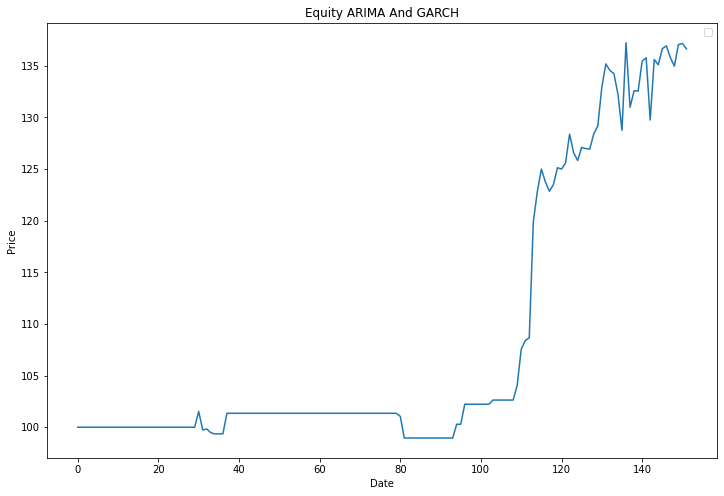

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(ArimaGarch)
plt.title('Equity ARIMA And GARCH')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


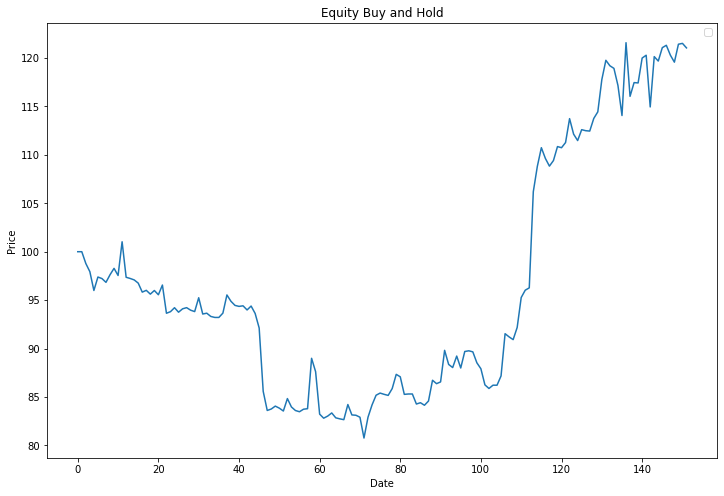

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(BH)
plt.title('Equity Buy and Hold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()